<img src='https://www.vmcdn.ca/f/files/nob/uploadedImages/Industry-News/agriculture/farm.jpg;w=960'> <br>

Image taken from [midlandtoday.ca](https://www.midlandtoday.ca/local-news/tiny-crawl-gives-residents-chance-to-visit-local-farms-4358891)

#Agricultural Sampling Frames <br>

Your Ministry of Agriculture is establishing a multiyear regional development plan that aims to support farmers financially. In the upcoming years they will need to carry out different field studies and analyses that impact hundreds of farmers. For example, they might decide to sponsor only one mode of irrigation and provide improved seeds for some selected crops. It is very costly to conduct an exhaustive census at different points in the development plan, which is where we need your help.

As an Analyst in the Department of Strategy and Statistics, you have to decide which method do we use to sample farmers. This is very important because the method you decide to use will be implemented multiple times by the data collection team whenever they're on the field and we need to capture the whole agricultural situation of the concerned region.

#### **Sampling and Inference**
During our last census, we have collected data for 606 farmers specialized in growing vegetables. You're tasked with taking samples from this dataset and comparing them against each other and the exhaustive dataset using 5 different methods:

1. Simple Random Sampling
2. Systematic Sampling
3. Replicated Sampling
4. Probability Proportional to Size Sampling
5. Stratified Sampling

<img src='https://hotcubator.com.au/wp-content/uploads/2020/07/Copy-of-Social-Business-1.png'> <br>


Be warned! This analysis will be rather lengthly, detailed and repetitive in some cases, which is because it is actually a real project! Sampling is a very practical thing and picking a good sampling method is a common problem relevant to almost all fields and industries. We're counting on you to help us choose an adequate method!




#### **Get to know the data!**

The Dataset contains 6 variables, among which 5 are categorical (qualitative) and 1 is numerical (quantitative):

1. **Production mode:**
  1. **Primary:** The same crop is planted year after year
  2. **In succession:** A different crop is planted each year (or each cycle)
  3. **In association:** Multiple crops are planted on the same field at the same time
  4. **Understory:** Crop is planted under trees (Can be in a forest)

2. **Irrigation:** 
  1.   **Yes:** The farmer uses a water source besides rain
  2.   **No:** The farmer is strictly relying on rain (Pluvial or Rainfed Irrigation mode)
3. **Irrigation mode:**

  1.   **Localized:** Farmer uses a drip irrigation system (continuous drops of water). This method is the most efficient in terms of water usage.
  2.   **Gravity:** An open air canal linking the field to the water source (eg. river). This irrigation system uses a lot of water, especially since much of it is lost through land absorption on the way and evaporation.
  3. **Aspersion:** Water is brought to the plants in the form of artificial rain using sprinklers fixed across the field.
  4. **Pivot:** A mobile system that pumps water from a source to a long tube with sprinklers in the sky that crosses the entire field. This sky tube moves from one side to the other and irrigates the whole field.
  5. **Gravity, Localized:** Mixed
  6. **Localized, Pivot:** Mixed

4. **Crop:**
  1. Tomatoes
  2. Potatoes
  3. ...
5. **Greenhouse:**
  1. **No:** Not used
  2. **Small tunel:** A tunnel that's small in width but high in length
  3. **Big Tunel:** A tunnel that's high in width but small in length
  4. **Canarian:** A structure made of only wires and films
  5. **Multi-chapel:** Greenhouse with more than one chapel (curve)

6. **Field area:**
  - Planted field area in Ha (Hectares)




In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import altair as alt (Graphs look better in quality than matplotlib)
import random
import math

# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

sns.set()
pd.set_option('display.max_rows',159)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Import your data. 
# Add an argument specifying the index column so it doesn't get treated as a numerical variable
df=pd.read_excel('/content/gdrive/MyDrive/Sampling Frame dataset.xlsx',index_col= 'ID')
df.index = df.index.astype('int16')

In [ ]:
df.head()

,Crop_Group,Production_Mode,Crop,Field_area,Irrigation,Irrigation_mode,Greenhouse
ID,,,,,,,
1,Vegetable,In succession,Zucchini,2.00,No,NaN,Small tunel
2,Vegetable,Primary,Tomato,2.00,No,NaN,Small tunel
3,Vegetable,Primary,Zucchini,0.75,No,NaN,No
4,Vegetable,Primary,Mint,0.10,Yes,Localized,No
5,Vegetable,In succession,Zucchini,1.75,Yes,Gravity,No


## Data Cleaning

In [ ]:
# Checking variable types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 1 to 606
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop_Group       606 non-null    object 
 1   Production_Mode  606 non-null    object 
 2   Crop             606 non-null    object 
 3   Field_area       606 non-null    float64
 4   Irrigation       606 non-null    object 
 5   Irrigation_mode  514 non-null    object 
 6   Greenhouse       606 non-null    object 
dtypes: float64(1), object(6)
memory usage: 37.9+ KB


We can see that all variables have their corresponding data type. Also, we can see that there are missing values in the 'Irrigation Mode' column.


In [ ]:
# Showing sum of missing values
df.isna().sum()

Crop_Group          0
Production_Mode     0
Crop                0
Field_area          0
Irrigation          0
Irrigation_mode    92
Greenhouse          0
dtype: int64

From the code above we can see that there are only 92 missing values.

In [ ]:
# Uniques values in Irrigation when Irrigation mode is NA
df.Irrigation[df.Irrigation_mode.isna()].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Missing values count grouped by Irrigation
df[['Irrigation', 'Irrigation_mode']][df.Irrigation_mode.isnull()].fillna(1)\
                    .groupby('Irrigation').count().rename({'Irrigation_mode':'Count'},axis = 1)

#missing_values = df[['Irrigation', 'Irrigation_mode']][df.Irrigation_mode.isnull()].fillna(1)
#pd.pivot_table(data=missing_values, index='Irrigation', aggfunc='count')


,Count
Irrigation,
No,91
Yes,1


We can clearly see that 99% of missing values are when there is no irrigation. Therefore we will fill those values with 'Rainfed' or 'Pluvial' because those farmers only rely on rain. But what happens when the farmer has irrigation, and there's a missing value? Let's take a closer look to determine a better way to fill the null value in this case.

In [ ]:
# Showing missing value when 'Irrigation' = yes
df.loc[(df.Irrigation == 'Yes') & (df.Irrigation_mode.isna())].head()

,Crop_Group,Production_Mode,Crop,Field_area,Irrigation,Irrigation_mode,Greenhouse
ID,,,,,,,
176,Vegetable,In succession,Green cabbage,1.75,Yes,NaN,No


In [ ]:
# Showing unique values for Irrigation_mode when Crop == Gren cabbage
df.Irrigation_mode.loc[df.Crop == 'Green cabbage'].unique()

array(['Localized', nan], dtype=object)

We can see that the missing value is related to the crop Green cabbage, so we looked to see if that crop had different irrigation methods and it looks like the only irrigation mode for this crop is 'Localized', therefore we are going to fill the missing value with this.

In [ ]:
df[(df.Irrigation == 'No') & (df.Irrigation_mode.isna() != True)].head()

,Crop_Group,Production_Mode,Crop,Field_area,Irrigation,Irrigation_mode,Greenhouse
ID,,,,,,,
44,Vegetable,In succession,Onion,2.00,No,Aspersion,No
45,Vegetable,Primary,Tomato,2.00,No,Aspersion,No
72,Vegetable,Primary,Green bean,0.75,No,Localized,No
73,Vegetable,Primary,Green bean,0.49,No,Localized,No
130,Vegetable,Primary,Potato,3.90,No,Localized,No


We also noticed that there are some farmers that have an irrigation mode, but they are not active or used in this case.

### Filling null values

In [ ]:
# Filling the null values adequately
df.loc[df.Irrigation == 'No','Irrigation_mode'] = df.loc[df.Irrigation == 'No','Irrigation_mode'].fillna('Rainfed')

df.Irrigation_mode.fillna('Localized',inplace = True)

## Describing numerical variable (Field_area)

In [ ]:
# What is the average, minimum and maximum area planted ?
df.Field_area.describe()

count    606.000000
mean       1.284490
std        1.899737
min        0.010000
25%        0.340000
50%        0.710000
75%        1.525000
max       20.000000
Name: Field_area, dtype: float64

The average planted area is 1.2855 Ha

The minimum area planted is 0.01 Ha

The Maximum area planted is 20 Ha

The 75% of the area planted are below 1.53 HA

 ### Is the distribution of the area planted equal across the whole population ?

For us to assume that the distribution of area planted is equally distributed across the whole population, we can use two methods, one is using visualizations to show the distribution of a variable, such as a histogram plot, Which gives us the frequency of occurrence per value in the dataset. 

Another method we can use is statistical inference (Hypothesis Testing). It can give a more objective answer to whether a variable deviates significantly from a normal distribution.

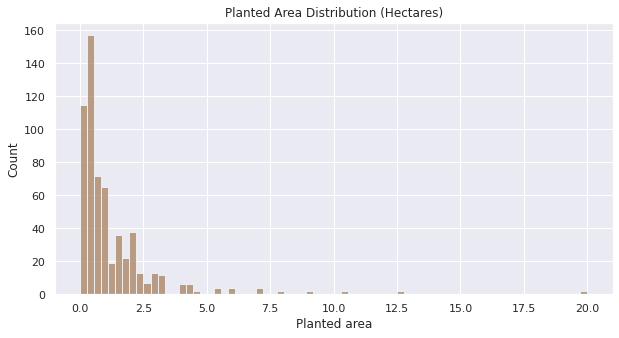

In [ ]:
# Histogram plot of Field Area
fig, ax  = plt.subplots(figsize = (10,5))
sns.histplot(df.Field_area,ax =ax, color ='#A68160')\
    .set(title = 'Planted Area Distribution (Hectares)', xlabel = 'Planted area')
plt.show()

In [ ]:
# The Shapiro Wilk test
from scipy.stats import shapiro

shapiro(df.Field_area)

ShapiroResult(statistic=0.5438402891159058, pvalue=7.773790447658342e-37)

As we can see clearly in the histogram, it is not even close to a normal distribution, which is confirmed by the Shapiro Wilk test. So we can conclude that the distribution is not equal across the whole population.

(If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution)

### What is the percentage of farmers holding 80% of the total area planted ?

For this task, let's create a relative frecuency table to get the percentage accumulation of planted area up until 80% and then devide the number of farmers by the total number of farmers. 

In [ ]:
# Percentile 80th
np.percentile(df.Field_area,80)

1.93

In [ ]:
df.Field_area.sort_values().value_counts(sort = False, normalize = True)\
                    .cumsum().to_frame().query('Field_area < 0.81').shape[0]/len(df)*100

19.801980198019802

In [ ]:
# Cumulative relative frequency up to 80% of area planted 
comulative_relative_frequency = df.Field_area.sort_values()\
                                .value_counts(sort = False, normalize = True)\
                                .cumsum().to_frame().query('index <= 1.93')

# Number of farmers holding 80% of the total area planted
farmers = len(comulative_relative_frequency)

# Percentage of farmers holding 80% of total area planted round up to two decimal points.
farmer_percent = round((farmers/len(df))*100,2)

print(f'The Percentage of farmers holding 80% of the total area planted is {farmer_percent}%, that is equals to {farmers} farmers')

The Percentage of farmers holding 80% of the total area planted is 19.8%, that is equals to 120 farmers


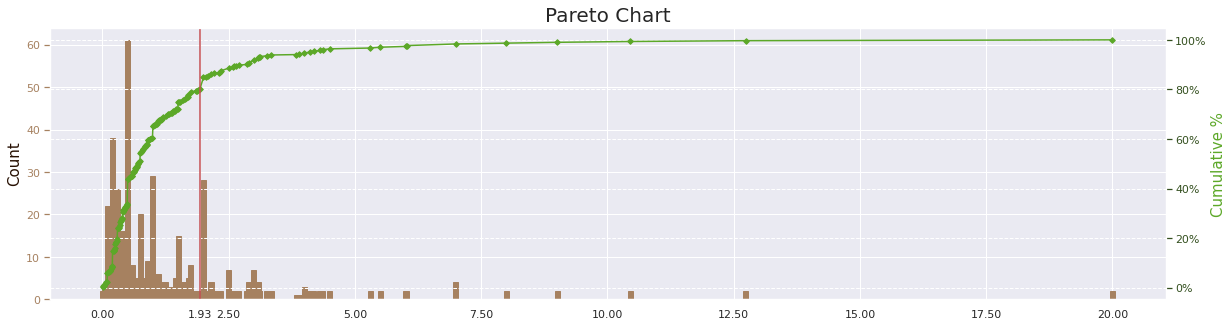

In [ ]:
#@title Pareto chart
from matplotlib.ticker import PercentFormatter

# Frequency table
ftd = df.Field_area.sort_values().value_counts(sort = False).to_frame()
# Add cumulative relative frequency 
ftd['cumperc'] = ftd.Field_area.cumsum()/ftd.Field_area.sum()*100

# Define aesthetics for plot
color1 = '#260F01'
color2 = '#334f1e'
barcolor = '#A68160'
linecolor = '#5CA828'
line_size = 4

# Create basic bar plot
fig, ax = plt.subplots(figsize = (20,5))
ax.bar(ftd.index, ftd.Field_area, color=barcolor,width = 0.1,edgecolor = barcolor)
ax.set_ylabel('Count', color=color1, size = 15)
plt.title('Pareto Chart', size = 20)

# Add xtick on 1.93 point
plt.xticks(list(plt.xticks()[0]) + [1.93])

# Add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(ftd.index, ftd.cumperc, color=linecolor, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative %', color=linecolor,size = 15)

# Specify axis colors
ax.tick_params(axis='y', colors=barcolor)
ax2.tick_params(axis='y', colors=color2)

# Add vertical red line
plt.axvline(x=1.93, color ='r')

# Add horizontal grid line
plt.grid(axis='y', linestyle = '--')

# Display Pareto chart
plt.show()

## Describing categorial variables

In [ ]:
#@title ### How many times does each category occur in each variable ?
# Looping into each variable in the data frame
for i in df[df.columns.difference(['Field_area'])].columns:

    # Printing column name
    print("Variable: {}".format(i))

    # Printing the count for each value
    print(df[i].value_counts().rename_axis('Unique Values')\
          .to_frame('Count'))
    # Adding blank line
    print('\n')


Variable: Crop
                       Count
Unique Values               
Zucchini                 118
Potato                   117
Tomato                    79
Green bean                71
Coriander and parsley     69
Cucumber                  49
Mint                      29
Eggplant                  10
Carrot                    10
Onion                      7
Cauliflower                7
Green cabbage              6
Celery                     5
Kiwat tomato               4
Lettuce                    4
Artichoke                  3
Strawberry                 3
Hot pepper                 3
Helda bean                 2
Absinthe                   2
Blueberry                  2
Jerusalem artichoke        2
Watermelon                 1
Turnip                     1
Pepper                     1
Endive                     1


Variable: Crop_Group
               Count
Unique Values       
Vegetable        606


Variable: Greenhouse
               Count
Unique Values       
No               537
S

In [ ]:
#@title ### How much percentage does each category take in its variable ?

# Function to help print the value as percentage (%)
def aspercent(column,decimals=2):
    assert decimals >= 0
    return (round(column*100,decimals).astype(str) + "%")

for i in df[df.columns.difference(['Field_area'])].columns:
  
    # Printing column name
    print("Variable: {}".format(i))

    # Printing the count for each value
    print(aspercent(df[i].value_counts(normalize=True)\
                    .rename_axis('Unique Values').\
                    to_frame('Percentage'),decimals=1))
    # Adding blank line
    print('\n')


Variable: Crop
                      Percentage
Unique Values                   
Zucchini                   19.5%
Potato                     19.3%
Tomato                     13.0%
Green bean                 11.7%
Coriander and parsley      11.4%
Cucumber                    8.1%
Mint                        4.8%
Eggplant                    1.7%
Carrot                      1.7%
Onion                       1.2%
Cauliflower                 1.2%
Green cabbage               1.0%
Celery                      0.8%
Kiwat tomato                0.7%
Lettuce                     0.7%
Artichoke                   0.5%
Strawberry                  0.5%
Hot pepper                  0.5%
Helda bean                  0.3%
Absinthe                    0.3%
Blueberry                   0.3%
Jerusalem artichoke         0.3%
Watermelon                  0.2%
Turnip                      0.2%
Pepper                      0.2%
Endive                      0.2%


Variable: Crop_Group
              Percentage
Unique Values

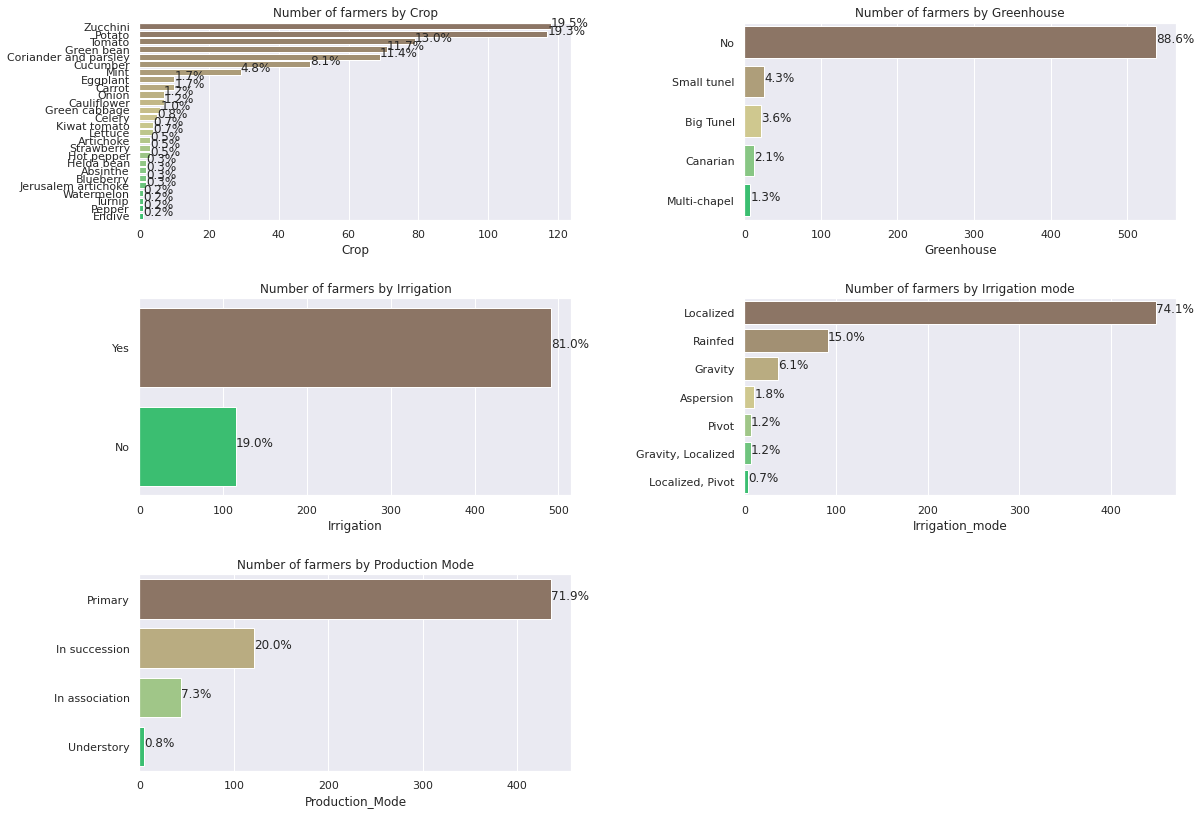

In [ ]:
#@title ### Visualizing our findings

# Function to add values to each bar in barplot
def show_values(axs, orient="v", df=[1], space=.01):
    '''
    Add values to bar plots.
    
    Parameters:
    axs (matplotlib.axes.Axes or numpy.ndarray): The axes object(s) to add values to.
    orient (str, optional): The orientation of the bars. Can be "v" (vertical) or "h" (horizontal). Default is "v".
    space (float, optional): The space between the bar and the value label. Default is 0.01.
    '''
    # Helper function to add values to a single axes object
    def _single(ax):
        if orient == "v":

          # Iterate through the patches (individual bars)
            for p in ax.patches:

               # Calculate the x and y position of the value label
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)

                # Format the value as a string and add it to the plot
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
                
        elif orient == "h":
            for p in ax.patches:

                # Calculate the x and y position of the value label
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)

                # Format the value as a string and add it to the plot
                value = '{:.1f}%'.format(p.get_width()/len(df)*100)
                ax.text(_x, _y, value, ha="left")
                
    # If axs is an array, apply the function to each element
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)

    # If axs is a single axes object, apply the function to it
    else:
        _single(axs)


def visualization(df,cols,graph_type,pal = 'terrain_r'):
  '''
    Generate charts from DataFrame
    
    Args:
        df (DataFrame): Pandas DataFrame.
        cols (index): Index of column names.
        graph_type (string): Desired type of chart.
        pal (string): Seaborn Palette, defaul "terrain_r".
    Returns:
        Plot for each column specified. 
  '''    
  
  # Avoid override DataFrame
  df = df.copy()

  # List to store chart coordinates
  ls = []
  n = math.ceil(len(cols)/2)
  

  if n < 2:
    ls.append((0,0))

  else:  
    for x in range(n):
      #for j in range(2):
      ls.append((x,0))
      ls.append((x,1))  

  # Creating subplots
  fig, axs = plt.subplots(nrows=math.ceil(len(cols)/2), ncols=2, figsize=(18,13))

  # validating chart type
  if graph_type == 'bar': 

    if n < 2:
       for i,j in zip(cols,range(len(ls))):

        # Palette
          unique_vals = len(df[i].unique())
          colors = sns.blend_palette([ sns.color_palette(pal)[1],
                                  sns.color_palette(pal)[2],
                                  sns.color_palette(pal)[4]],
                                  unique_vals)

          data = df[i].value_counts().to_frame()

          # Plot
          ax = sns.barplot(x =str(i), y = data.index, data = data,palette = colors,ax = axs[ls[j][0]])\

          # Show values on barplot
          show_values(ax,'h',df)
          #ax.set_title(i.replace("_"," ") + " Frequency")
          ax.set_title('Number of farmers by '+i.replace("_"," "))
          ax.set_xlabel = 'Count'
          ax.set_ylabel = i.replace("_" , " ")

    else:  

      # Iterating every column to create chart 
      for i,j in zip(cols,range(len(ls))):

        # Palette
          unique_vals = len(df[i].unique())
          colors = sns.blend_palette([ sns.color_palette(pal)[1],
                                  sns.color_palette(pal)[2],
                                  sns.color_palette(pal)[4]],
                                  unique_vals)

          data = df[i].value_counts().to_frame()

          # Plot
          ax = sns.barplot(x =str(i), y = data.index, data = data,palette = colors,ax = axs[ls[j][0],ls[j][1]])\

          # Show values on barplot
          show_values(ax,'h',df)
          #ax.set_title(i.replace("_"," ") + " Frequency")
          ax.set_title('Number of farmers by '+i.replace("_"," "))
          ax.set_xlabel = 'Count'
          ax.set_ylabel = i.replace("_" , " ")

  else:
    
    # Palette
    sns.set_palette(sns.color_palette(pal)[1:])

    if n<2:
      # Iterating every column to create chart 
      for i,j in zip(cols,range(len(ls))):
        
        # Plot
        df[i].value_counts().plot(kind=graph_type,ax = axs[ls[j][0]])\
        .set(title = i.replace("_"," ") + " Count", xlabel = "Count" , ylabel = i.replace("_" , " "))
        
    else:
      # Iterating every column to create chart 
      for i,j in zip(cols,range(len(ls))):
        
        # Plot
        df[i].value_counts().plot(kind=graph_type,ax = axs[ls[j][0],ls[j][1]])\
        .set(title = i.replace("_"," ") + " Count", xlabel = "Count" , ylabel = i.replace("_" , " "))

  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  
  # If n is not even delete last subplot
  if len(cols)%2 !=0:
    axs.flat[-1].set_visible(False)

  # Display plot
  plt.show()

# Ploting all columns from dataframe except of 'Field_area' and 'Crop_Group'
visualization(df,df[df.columns.difference(['Field_area','Crop_Group'])].columns,'bar')

## Digging deeper into the data

In [ ]:
#@title ### Which crop has the highest Field area ?
df.groupby(['Crop'],as_index = False)['Field_area'].sum().max()

Crop          Zucchini
Field_area      223.53
dtype: object

The crop with highest field area is the Zucchini with 2233.53 Ha.

### Are the number of farmers planting the same crops correlated to the sum of their planted area ?

In [ ]:
farmers_crop = df.groupby(['Crop'],as_index = False)['Field_area'].sum()
farmers_crop['number_of_farmers'] = df.groupby(['Crop']).size().values

In [ ]:
farmers_crop.head()

,Crop,Field_area,number_of_farmers
0,Absinthe,2.15,2
1,Artichoke,5.70,3
2,Blueberry,10.78,2
3,Carrot,29.48,10
4,Cauliflower,13.49,7


In [ ]:
farmers_crop.corr()

,Field_area,number_of_farmers
Field_area,1.000000,0.909436
number_of_farmers,0.909436,1.000000


There is a hight correlation between the number of farmers panting the same crops and the sum of their planted area.

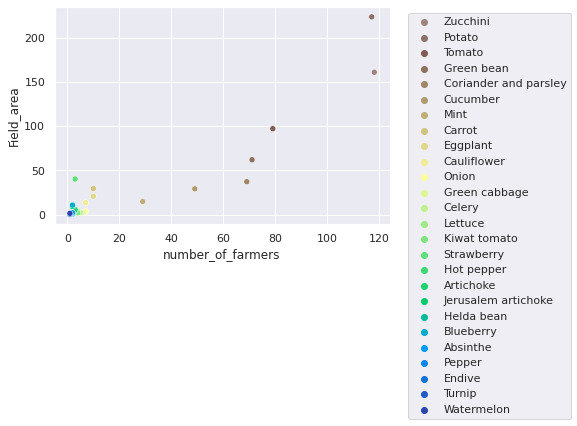

In [ ]:
#@title #### Visualizing our findings
# Setting our palette to start from the 5th value
palette = sns.color_palette("terrain_r", 31)
palette = palette[5:]

# Scatterplot
sns.scatterplot(x = 'number_of_farmers', y ='Field_area', 
                data = farmers_crop.sort_values(by='number_of_farmers',ascending=False),hue='Crop',palette = palette)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [ ]:
#@title ### Is the Production mode used the same for the same crops ?
df.groupby(['Crop','Production_Mode'])['Production_Mode'].count()

Crop                   Production_Mode
Absinthe               In association       1
                       Primary              1
Artichoke              In succession        1
                       Primary              2
Blueberry              In succession        1
                       Primary              1
Carrot                 In association       1
                       In succession        7
                       Primary              2
Cauliflower            In succession        5
                       Primary              2
Celery                 In association       1
                       In succession        1
                       Primary              3
Coriander and parsley  In association      10
                       In succession        7
                       Primary             50
                       Understory           2
Cucumber               In association       1
                       In succession        7
                       Primary           

As shown in the table above, the production mode is different even for the same crop, except for Endive, Jerusalem artichoke, Kiwat tomato, Turnip, and Watermelon.

In [ ]:
# Percentage of crops that has only one production mode
5/len(df)*100

0.825082508250825

In [ ]:
#@title ### Is the Irrigation mode used the same for the same crop ?
df.groupby(['Crop','Irrigation_mode'])['Irrigation_mode'].count()

Crop                   Irrigation_mode   
Absinthe               Gravity                2
Artichoke              Localized              2
                       Rainfed                1
Blueberry              Localized              2
Carrot                 Gravity                2
                       Localized              4
                       Rainfed                4
Cauliflower            Gravity                1
                       Localized              3
                       Pivot                  1
                       Rainfed                2
Celery                 Localized              4
                       Rainfed                1
Coriander and parsley  Gravity                3
                       Localized             62
                       Localized, Pivot       1
                       Pivot                  1
                       Rainfed                2
Cucumber               Aspersion              1
                       Gravity                

The irrigation mode is the same for 42.31% of the crop groups.

### Who uses Green houses and who doesn't ?

In [ ]:
# Crops that uses Green House
green = df[df.Greenhouse != 'No']['Crop'].unique()
print(green)

['Zucchini' 'Tomato' 'Blueberry' 'Cucumber' 'Green bean' 'Kiwat tomato'
 'Coriander and parsley' 'Potato' 'Carrot' 'Strawberry' 'Onion']


In [ ]:
# Crops that doesn't use Green House
no = df[df.Greenhouse == 'No']['Crop'].unique()
s = set(green)
no_green = [x for x in no if x not in s]
print(no_green)

['Mint', 'Cauliflower', 'Green cabbage', 'Hot pepper', 'Lettuce', 'Eggplant', 'Celery', 'Watermelon', 'Helda bean', 'Artichoke', 'Turnip', 'Absinthe', 'Pepper', 'Endive', 'Jerusalem artichoke']


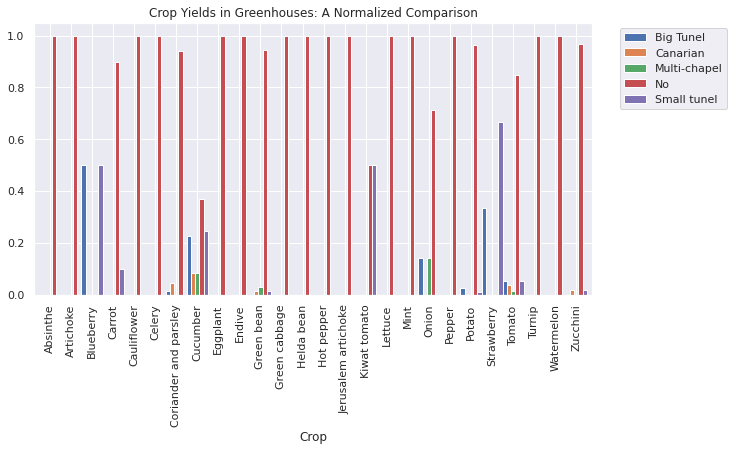

In [ ]:
#@title #### **Visualizing our findings**:
fig, ax = plt.subplots(figsize=(10,5))
pd.crosstab(df.Crop, df.Greenhouse,normalize = 'index').plot(kind='bar',
                                                             ax=ax,title= 'Crop Yields in Greenhouses: A Normalized Comparison',
                                                              width=1)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

look for farmers area planted and ..is there a corr between having more land and having greenhouse..... small farmers doesn't have greenhouse (hypothesis)

In [ ]:
#@title ### Which crops are relying only on rain ?
# Crops that only rely on rain
no = df.Crop[df.Irrigation == 'No'].unique()
s = set(df.Crop[df.Irrigation == 'Yes'].unique())
no_green = [x for x in no if x not in s]
print(no_green)

['Endive', 'Jerusalem artichoke']


Endive and Jerusalem artichoke are the only crops that only rely on rain.

**Visualizing our findings**:

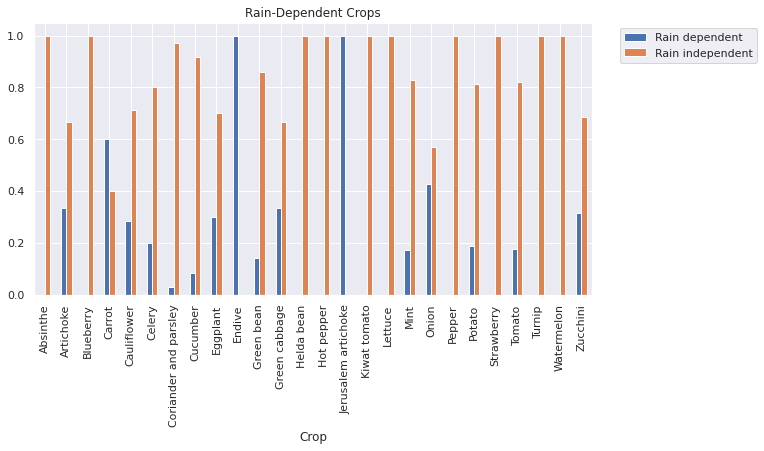

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(10,5))
pd.crosstab(df.Crop, df.Irrigation,normalize = 'index').plot(kind='bar',ax=ax,title= 'Rain-Dependent Crops')

plt.legend(['Rain dependent','Rain independent'],bbox_to_anchor=(1.04, 1), loc="upper left")

### Does the Irrigation mode impact the planted area ?

In [ ]:
df.groupby(['Irrigation_mode'])['Field_area'].agg(['mean','median','sum','count'])

,mean,median,sum,count
Irrigation_mode,,,,
Aspersion,1.172727,1.30,12.900,11
Gravity,1.887838,0.75,69.850,37
"Gravity, Localized",5.970000,0.50,41.790,7
Localized,0.956840,0.60,429.621,449
"Localized, Pivot",0.650000,0.31,2.600,4
Pivot,0.971429,0.50,6.800,7
Rainfed,2.360879,1.90,214.840,91


When the crops only relay on rain, farmers have a greater terrain.

In [ ]:
df.Field_area.sum()

778.4010000000001

The mixed mode "Gravity, Localized" is the irrigation mode that, on average, most impacts the planted area.

# Sampling

Determining an accurate sample size is an intermediate and very detailed field in statistics. However if you would like to specify your own please do. <br>

We are going to use **200 observations** for all samples in this project.

**Simple Random Sampling:**
This takes a totally random sample from the population. We should run this at least 3 times and compare the 3 against each other. We can also shuffle and sort the population as we run this sample. If we get consistent results it's a good sign.

**Systematic Sampling:**
This follows a *step* while sampling and skips rows equally.
$step =  \frac{N}{n}$ where $N$ is the Population size and $n$ the sample size. <br>
This should also be implemented at least a second time by starting from the second row (0,4,8,...) and then (1,5,9,...). We can also shuffle and sort as mentioned above.

**Replicated Sampling:**
This combines both Random and Systematic sampling. Take equal samples of 100 each using each method and combine them. **Note:** It is better **NOT** take unequal samples.

**Stratified Sampling:**
A bit more advanced. With this method we choose a measure of size for the numerical variable. We recommend using the median. Then split the population into two subsets; one containing rows lower than the median and the other the rows higher or equal to the median. 

This is the formula:

$ns_{h} = n \frac{C_{h} X_h^q}{\sum_{h}C_{h} X_h^q}$  with $q=\frac{1}{2}$ and $C_{h}=\frac{S_{h}}{\bar{Y_{h}}}$

Where:
- $h$= ID of the dataset (1 or 2) <br>
- $n$ = Sample size (200) <br>
- $S$ = Standard deviation of the numerical variable in that specific data subset (one for each strata, $S_1$ and $S_2$) <br>
- $\bar{Y}$ = Mean of the numerical variable in that data subset (one for each strata, $Y_1$ and $Y_2$) <br>
- $X$ = Median of your numerical variable in that data subset (you will have two, $X_1$ and $X_2$) <br>

In the end we will have two new "mini sample sizes" $ns_1$ and $ns_2$ that add up to $n$. Extract a random sample from each subset using its respective mini sample size and combine both in one dataframe. Our stratified sample is now ready !

**Probability Proportional to Size Sampling (PPS):**
This one is the most advanced (more than stratified) and cannot be explained in one page. We count on you to refer to this <a href="https://cdn.who.int/media/docs/default-source/hq-tuberculosis/global-task-force-on-tb-impact-measurement/meetings/2008-03/p20_probability_proportional_to_size.pdf?sfvrsn=51372782_3">document</a>  to grasp the concept !


In [3]:
#@title #### Sampling functions

# Simple Random Sampling
def random_sampling(df, sample_size):
    '''
    Returns a random sampled dataframe of length sample_size.
    
    Parameters:
        df: The dataframe to sample from.
        sample_size: Number of rows to include in the sample.
    Returns:
        A sampled dataframe of length sample_size.
  '''   
    
    return df.sample(sample_size)

# Systematic Sampling
def systematic_sampling(df, sample_size):
    '''
    Returns a systematic sampled dataframe of length sample_size. 
    
    Parameters:
        df: The dataframe to sample from.
        sample_size: used to calculate steps.

    Returns:
        A systematically sampled dataframe of length sample_size. 
    '''     

    # Population size
    N = df.shape[0]

    # Set step size / sampling interval
    sampling_interval = N/sample_size

    # Generate a list of indices for the sample
    sample_indices = [int(i * sampling_interval) for i in range(sample_size)]

  
    #df.iloc[::step]

    return df.iloc[sample_indices]

# Replicated Sampling
def replicated_sampling(df, sample_size):
  '''
    Returns a replicated sample of the input dataframe of length sample_size.
    
    Parameters:
        df: The dataframe to sample from.
        sample_size: Number of rows to include in the sample.
    Returns:
        A replicated sample of the input dataframe with sample_size replicates. 
  '''  
  sample_size = sample_size // 2
  # Random sampling
  random = random_sampling(df,sample_size)

  # Systematic sampling
  systematic = systematic_sampling(df,sample_size)

  return pd.concat([random,systematic],axis = 0)


# Probability Proportional to Size Sampling
def pps_sampling(df, variable,sample_size):
    """Perform PPS sampling on a DataFrame.

      Args:
          df (dataFrame): The DataFrame to sample from.
          variable (str): The variable to base the sampling on. Can be either a numerical or categorical variable.
          sample_size (int): The size of the sample to return.

      Returns:
          A DataFrame containing the selected samples.
      """

    if df[variable].dtype == 'float' or df[variable].dtype == 'int':

        # Calculate the population size (total field area)
        population_size = df[variable].sum()

        # Calculate the sampling interval
        sampling_interval = population_size / sample_size

        # Calculate the probability of each crop being selected
        crop_probabilities = df[variable] / population_size
        
        # Calculate the cumulative sum of the probabilities
        #cum_sum = crop_probabilities.cumsum()
    else:

        # Calculate the population size (total number of rows)
        population_size = df[variable].count()

        # Calculate the sampling interval
        sampling_interval = population_size / sample_size

        # Calculate the probability of each crop being selected
        crop_counts = df[variable].value_counts()
        crop_probabilities = crop_counts / population_size

        # Calculate the cumulative sum of the probabilities
        #cum_sum = crop_probabilities.cumsum()

    # Select a random starting point
    start = df[variable].sample(1).iloc[0]

    # Select the samples
    samples = df[df[variable].eq(start)]

    # Select additional samples until the sample size is reached
    while len(samples) < sample_size:
      
        if variable in df.select_dtypes(include=['float', 'int']).columns:
            # Select the next crop based on its probability
            next_crop = random.choices(df.index, weights=crop_probabilities)[0]
            #next_crop = random.choices(df.index, weights=probabilities, cum_weights=cum_sum)[0]

        else:
            # Select the next crop based on its probability
            next_crop = random.choices(list(crop_counts.index), weights=list(crop_probabilities))[0]
            #next_crop = random.choices(list(crop_counts.index), weights=list(crop_probabilities), cum_weights=list(cum_sum))[0]
            

            
        samples = pd.concat([samples, df[df[variable].eq(next_crop)]])

    # Trim the sample to the desired size
    samples = samples.iloc[:sample_size]

    return samples


# Stratified Sampling
def stratified_sampling(df, sample_size):
    '''
    Returns a stratified sample of the input dataframe.
    
    Parameters:
        df: The dataframe to sample from.
        sample_size: The number of rows to include in the sample.
        stratify_by: The column to stratify the sample by.
    
    Returns:
        A stratified sample of the input dataframe, with approximately equal numbers of rows in each stratum.
    '''

    field_area_median = df.Field_area.median()
    lower = df.loc[df.Field_area< field_area_median]
    upper = df.loc[df.Field_area>= field_area_median]

    lower_std = lower.Field_area.std()
    upper_std = upper.Field_area.std()

    lower_mean = lower.Field_area.mean()
    upper_mean = upper.Field_area.mean()

    lower_median = lower.Field_area.median()
    upper_median = upper.Field_area.median()

    C1 = lower_std/lower_mean
    C2 = upper_std/upper_mean

    lower_sample = round(sample_size*(C1*np.sqrt(lower_median))/(C1*np.sqrt(lower_median)+C2*np.sqrt(upper_median)))
    upper_sample = round(sample_size*(C2*np.sqrt(upper_median))/(C1*np.sqrt(lower_median)+C2*np.sqrt(upper_median)))

    lower_df = lower.sample(lower_sample)
    upper_df = upper.sample(upper_sample)

    strata_df = pd.concat([lower_df,upper_df],axis = 0)

    strata_df = strata_df.reset_index().drop(['ID'],axis = 1)

    return   strata_df, lower, upper, lower_sample, upper_sample, lower_df, upper_df

## Analyzing Random Samples

**Were the results consistent? Does the Field_area feature still follow the same distribution?**

In [14]:
# Setting random seed
np.random.seed(500)

# Getting 3 random samples
random1 = random_sampling(df, 200)
random2 = random_sampling(df, 200)
random3 = random_sampling(df, 200)

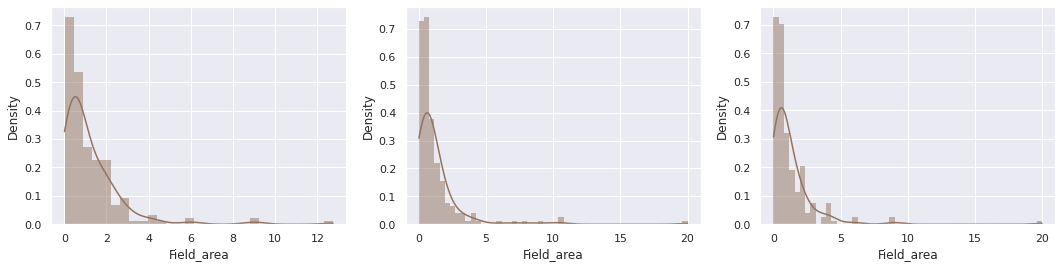

In [ ]:
#@title Visualizing our findings
color = sns.color_palette('terrain_r')[1]
fig,ax = plt.subplots(ncols=3,figsize=(18,4))
sns.histplot(random1.Field_area,kde=True, stat="density", linewidth=0, ax =ax[0],color = color)
sns.histplot(random2.Field_area,kde=True, stat="density", linewidth=0, ax =ax[1],color = color)
sns.histplot(random3.Field_area,kde=True, stat="density", linewidth=0, ax =ax[2], color = color)
plt.show()

Using visualization to compare the distribution of the random samples, it looks like they are consistent having the same distribution.

### **Statistical test:**

In [ ]:
#@title #### Kolmogorov-Smirnov test:
from scipy.stats import ks_2samp


# Perform the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(random1.Field_area, random2.Field_area)

print(f"KS statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("The samples are likely from different distributions (reject H0)")
else:
    print("The samples are likely from the same distribution (fail to reject H0)")


KS statistic: 0.075
p-value: 0.628
The samples are likely from the same distribution (fail to reject H0)


**(KS)** test is a nonparametric test used to determine whether two samples come from the same underlying distribution. 

In [ ]:
#@title #### Kruskal-Wallis test:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(random1.Field_area, random2.Field_area, random3.Field_area)

print(f"Kruskal-Wallis statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("The samples are likely from different distributions (reject H0)")
else:
    print("The samples are likely from the same distribution (fail to reject H0)")


Kruskal-Wallis statistic: 0.647
p-value: 0.723
The samples are likely from the same distribution (fail to reject H0)


The Kruskal-Wallis test can be used to compare the medians of three or more independent samples.

Values not in Sample 1:
['Blueberry' 'Kiwat tomato' 'Helda bean' 'Artichoke' 'Pepper']

Values not in Sample 2:
['Lettuce' 'Turnip' 'Absinthe' 'Pepper']

Values not in Sample 3:
['Onion' 'Watermelon' 'Helda bean' 'Absinthe' 'Pepper' 'Endive'
 'Jerusalem artichoke']



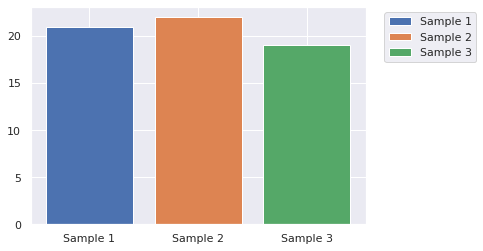

In [ ]:
#@title Were any crops nonexistent in the Random samples ?
samples = [random1.Crop, random2.Crop, random3.Crop]

labels = ['Sample 1', 'Sample 2', 'Sample 3']


fig, ax = plt.subplots()

for i, sample in enumerate(samples):
    ax.bar(i, sample.nunique(), label=labels[i])
    
    # Find the elements in the population that are not in the sample
    in_sample = df.Crop.isin(sample)
    population_not_in_sample = df[~in_sample]
    
    print(f'Values not in {labels[i]}:')
    print(f'{population_not_in_sample.Crop.unique()}\n')

ax.set_xticks(range(len(samples)))
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

As we can see, there are some crops that were left out from the samples.

----------------------------------------------------------------------------------------

## Comparing all sampling methods

**Were the results consistent? Does the Field_area feature still follow the same distribution in all samplings?**

In [4]:
systematic = systematic_sampling(df,200)
replicated = replicated_sampling(df, 100)
pps = pps_sampling(df,'Field_area',200)
stratified, lower,upper,lower_sample, upper_sample, lower_df, upper_df = stratified_sampling(df,200)


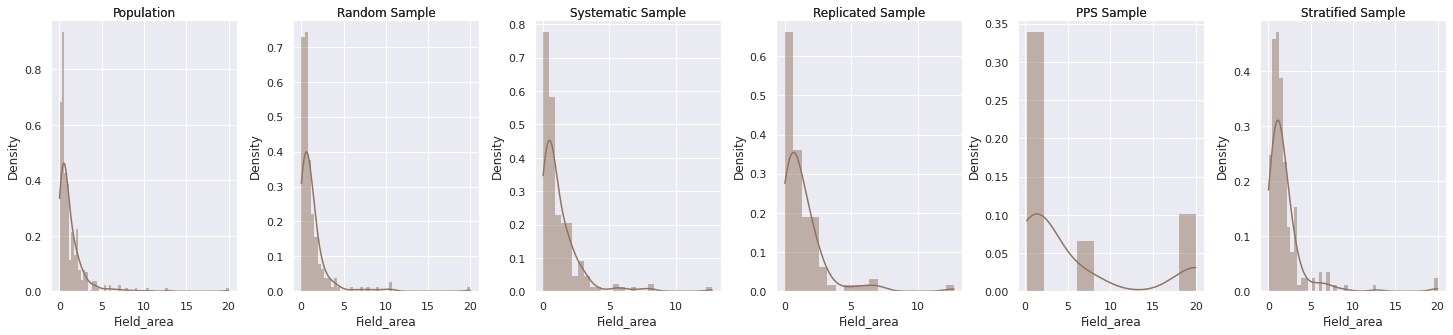

In [ ]:
#@title Visualizing distributions:

color = sns.color_palette('terrain_r')[1]
fig,ax = plt.subplots(ncols=6,figsize=(25,5))

g = sns.histplot(df.Field_area,kde=True, stat="density", linewidth=0, ax =ax[0],color = color)
g.axes.title= plt.text(0.5, 1.0, 'Population', ha='center', va='bottom', transform=g.axes.transAxes)

g = sns.histplot(random2.Field_area,kde=True, stat="density", linewidth=0, ax =ax[1],color = color)
g.axes.title= plt.text(0.5, 1.0, 'Random Sample', ha='center', va='bottom', transform=g.axes.transAxes)

g = sns.histplot(systematic.Field_area,kde=True, stat="density", linewidth=0, ax =ax[2],color = color)
g.axes.title= plt.text(0.5, 1.0, 'Systematic Sample', ha='center', va='bottom', transform=g.axes.transAxes)

g = sns.histplot(replicated.Field_area,kde=True, stat="density", linewidth=0, ax =ax[3],color = color)
g.axes.title= plt.text(0.5, 1.0, 'Replicated Sample', ha='center', va='bottom', transform=g.axes.transAxes)

g = sns.histplot(pps.Field_area,kde=True, stat="density", linewidth=0, ax =ax[4],color = color)
g.axes.title= plt.text(0.5, 1.0, 'PPS Sample', ha='center', va='bottom', transform=g.axes.transAxes)

g = sns.histplot(stratified.Field_area,kde=True, stat="density", linewidth=0, ax =ax[5],color = color)
g.axes.title= plt.text(0.5, 1.0, 'Stratified Sample', ha='center', va='bottom', transform=g.axes.transAxes)

# Give more space between the subplots
plt.subplots_adjust( wspace=0.3)

# Show plots
plt.show()

In [ ]:
#@title #### Kruskal-Wallis test:
statistic, p_value = kruskal(random1.Field_area, systematic.Field_area, replicated.Field_area, pps.Field_area,stratified.Field_area)

print(f"Kruskal-Wallis statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("The samples are likely from different distributions (reject H0)")
else:
    print("The samples are likely from the same distribution (fail to reject H0)")

Kruskal-Wallis statistic: 98.539
p-value: 0.000
The samples are likely from different distributions (reject H0)


As we can see from the graphs and from the Kruskal-Wallis test, the samples distribution differ from each other.

In [ ]:
#@title #### Kolmogorov-Smirnov test

# Perform the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(systematic.Field_area, df.Field_area)

print(f"KS statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("The samples are likely from different distributions (reject H0)")
else:
    print("The samples are likely from the same distribution (fail to reject H0)")

KS statistic: 0.033
p-value: 0.995
The samples are likely from the same distribution (fail to reject H0)


Values not in Random Sample:
['Lettuce' 'Turnip' 'Absinthe' 'Pepper']

Values not in Systematic Sample:
['Helda bean' 'Artichoke' 'Turnip' 'Absinthe' 'Pepper']

Values not in Replicated Sample:
['Cauliflower' 'Blueberry' 'Green cabbage' 'Lettuce' 'Eggplant'
 'Watermelon' 'Helda bean' 'Artichoke' 'Turnip' 'Absinthe' 'Pepper'
 'Endive' 'Strawberry' 'Jerusalem artichoke']

Values not in PPS Sample:
['Blueberry' 'Green cabbage' 'Watermelon' 'Helda bean' 'Artichoke'
 'Turnip' 'Absinthe' 'Pepper' 'Jerusalem artichoke']

Values not in Stratified Sample:
['Onion' 'Blueberry' 'Kiwat tomato' 'Green cabbage' 'Helda bean'
 'Absinthe' 'Endive']



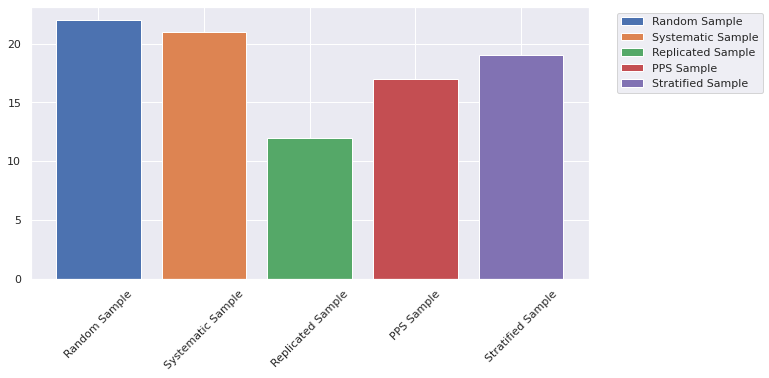

In [ ]:
#@title Were any crops nonexistent in the samples ?
samples = [random2.Crop,systematic.Crop,replicated.Crop,pps.Crop,stratified.Crop]
labels = ['Random Sample','Systematic Sample','Replicated Sample','PPS Sample','Stratified Sample']

fig, ax = plt.subplots(figsize = (10,5))

for i, sample in enumerate(samples):
    ax.bar(i, sample.nunique(), label=labels[i])
    
    # Find the elements in the population that are not in the sample
    in_sample = df.Crop.isin(sample)
    population_not_in_sample = df[~in_sample]
    
    print(f'Values not in {labels[i]}:')
    print(f'{population_not_in_sample.Crop.unique()}\n')

ax.set_xticks(range(len(samples)))
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()

As we can see, some samples were less representative of the population. Letting out the samples a more significant number of crops.

### Percentage of Each Crop per Sample

In [ ]:
# Random sampling Crop value count
crop_random = random1['Crop'].value_counts().to_frame()

# Systematic sampling Crop value count
crop_systematic = systematic['Crop'].value_counts().to_frame()

# Replicated sampling Crop value count
crop_replicated = replicated['Crop'].value_counts().to_frame()

# PPS sampling Crop value count
crop_pps = pps['Crop'].value_counts().to_frame()

# Stratified sampling Crop value count
crop_stratified = stratified['Crop'].value_counts().to_frame()

# Population Crop value count
crop_population =  df['Crop'].value_counts().to_frame()

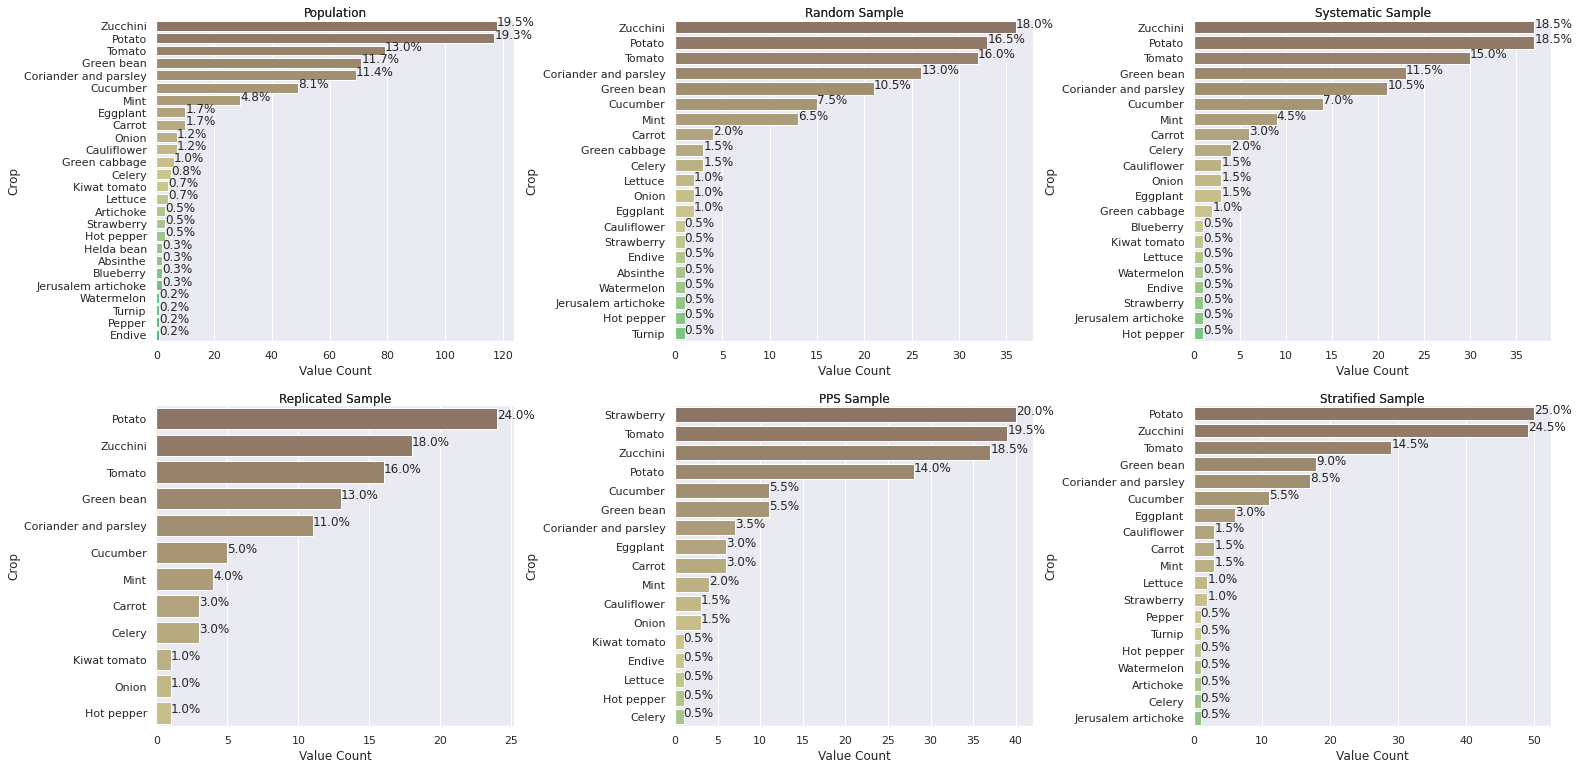

In [ ]:
#@title #### Plotting Percentage of Each Crop per Sampling method


# defining color palette
unique_vals = len(df['Crop'].unique())
colors = sns.blend_palette([ sns.color_palette('terrain_r')[1],
                        sns.color_palette('terrain_r')[2],
                        sns.color_palette('terrain_r')[4]],
                        unique_vals)

# Plotting percentage for each crop per sampling comparison
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(25,13))

g = sns.barplot(x= 'Crop', y = crop_population.index,data = crop_population, ax = ax[0][0], palette = colors)
g.axes.title= plt.text(0.5, 1.0, 'Population', ha='center', va='bottom', transform=g.axes.transAxes)
show_values(g,'h',df)
g.axes.set_xlabel('Value Count')
g.axes.set_ylabel('Crop')

g = sns.barplot(x= 'Crop', y = crop_random.index, data = crop_random, ax =ax[0][1], palette = colors)
g.axes.title= plt.text(0.5, 1.0, 'Random Sample', ha='center', va='bottom', transform=g.axes.transAxes)
show_values(g,'h',random1)
g.axes.set_xlabel('Value Count')
g.axes.set_ylabel('Crop')

g = sns.barplot(x= 'Crop', y = crop_systematic.index, data = crop_systematic, ax = ax[0][2],palette = colors)
g.axes.title= plt.text(0.5, 1.0, 'Systematic Sample', ha='center', va='bottom', transform=g.axes.transAxes)
show_values(g,'h',systematic)
g.axes.set_xlabel('Value Count')
g.axes.set_ylabel('Crop')

g = sns.barplot(x= 'Crop', y = crop_replicated.index, data = crop_replicated, ax = ax[1][0],palette = colors)
g.axes.title= plt.text(0.5, 1.0, 'Replicated Sample', ha='center', va='bottom', transform=g.axes.transAxes)
show_values(g,'h',replicated)
g.axes.set_xlabel('Value Count')
g.axes.set_ylabel('Crop')

g = sns.barplot(x= 'Crop', y = crop_pps.index, data = crop_pps, ax = ax[1][1],palette = colors)
g.axes.title= plt.text(0.5, 1.0, 'PPS Sample', ha='center', va='bottom', transform=g.axes.transAxes)
show_values(g,'h',pps)
g.axes.set_xlabel('Value Count')
g.axes.set_ylabel('Crop')

g = sns.barplot(x= 'Crop', y = crop_stratified.index,data = crop_stratified, ax = ax[1][2],palette = colors)
g.axes.title= plt.text(0.5, 1.0, 'Stratified Sample', ha='center', va='bottom', transform=g.axes.transAxes)
show_values(g,'h',stratified)
g.axes.set_xlabel('Value Count')
g.axes.set_ylabel('Crop')

# Give more space between the subplots
plt.subplots_adjust(hspace=0.2, wspace=0.45)

# Show plots
plt.show()

Just as we could see, the proportions of crops varies persample. Being Systematic the most accurate of the samples so far.

In [ ]:
#@title ### Comparing Field_area statistics
pop = df.Field_area.describe()
field_random = random1.Field_area.describe()
field_systematic = systematic.Field_area.describe()
field_replicated = replicated.Field_area.describe()
field_pps = pps.Field_area.describe()
field_stratified = stratified.Field_area.describe()

comparison = pd.DataFrame({'Population':pop,
                           'Random':field_random,'Random/POP':field_random/pop,
                           'Systematic Sample':field_systematic,'Systematic/POP':field_systematic/pop,
                           'Replicated':field_replicated,'Replicated/POP':field_replicated/pop,
                           'PPS':field_pps,'PPS/POP':field_pps/pop,
                           'Stratified':field_stratified,'Stratified/POP':field_stratified/pop})


comparison.style.set_properties(**{'background-color': 'cornsilk'}, subset = ['Random/POP','Systematic/POP','PPS/POP','Replicated/POP','Stratified/POP'])\
                                .set_caption('Field_area Comparison')


,Population,Random,Random/POP,Systematic Sample,Systematic/POP,Replicated,Replicated/POP,PPS,PPS/POP,Stratified,Stratified/POP
count,606.000000,200.000000,0.330033,200.000000,0.330033,100.000000,0.165017,200.000000,0.330033,200.000000,0.330033
mean,1.284490,1.221925,0.951292,1.203725,0.937123,1.384200,1.077626,5.773000,4.494390,1.897865,1.477524
std,1.899737,1.543630,0.812549,1.549916,0.815858,1.789691,0.942073,7.413492,3.902378,2.473440,1.301991
min,0.010000,0.010000,1.000000,0.030000,3.000000,0.030000,3.000000,0.200000,20.000000,0.020000,2.000000
25%,0.340000,0.347500,1.022059,0.300000,0.882353,0.300000,0.882353,1.000000,2.941176,0.750000,2.205882
50%,0.710000,0.750000,1.056338,0.695000,0.978873,0.900000,1.267606,2.000000,2.816901,1.275000,1.795775
75%,1.525000,1.660000,1.088525,1.610000,1.055738,1.782500,1.168852,7.000000,4.590164,2.000000,1.311475
max,20.000000,12.740000,0.637000,12.740000,0.637000,12.740000,0.637000,20.000000,1.000000,20.000000,1.000000


In [ ]:
#@title #### Comparing the Standard Deviation for each Sampling Method over the Population
l = np.array([np.std(df['Field_area']),np.std(random1['Field_area']),np.std(systematic['Field_area']),
              np.std(replicated['Field_area']),np.std(pps['Field_area']),np.std(stratified['Field_area'])])

l0 = l/np.std(df.Field_area)
l1 = l/np.std(random1.Field_area)
l2 = l/np.std(systematic.Field_area)
l3 = l/np.std(replicated.Field_area)
l4 = l/np.std(pps.Field_area)
l5 = l/np.std(stratified.Field_area)

idx = ['Population','Random Sample','Systematic Sample','Replicated Sample','PPS Sample','Stratified Sample']
std_frame = pd.DataFrame({'Population':l0,'Random Sample':l1,'Systematic Sample':l2,'Replicated Sample':l3,'PPS Sample':l4,'Stratified Sample':l5},index = idx)

def color_one(val):
  if val ==1:
    color = 'brown'
  else:
    color = 'black'
  return 'color: %s' % color

std_frame = std_frame.style.applymap(color_one)\
            .set_caption('Field Area Standard Deviation Comparison by Sampling Method over the Population')

std_frame


,Population,Random Sample,Systematic Sample,Replicated Sample,PPS Sample,Stratified Sample
Population,1.000000,1.232764,1.227765,1.065956,0.256685,0.769347
Random Sample,0.811185,1.000000,0.995944,0.864688,0.208219,0.624082
Systematic Sample,0.814488,1.004072,1.000000,0.868209,0.209067,0.626624
Replicated Sample,0.938125,1.156487,1.151796,1.000000,0.240803,0.721743
PPS Sample,3.895825,4.802635,4.783156,4.152779,1.000000,2.997240
Stratified Sample,1.299804,1.602353,1.595854,1.385534,0.333640,1.000000


In [ ]:
#@title #### Comparing the Mean for ach Sampling Method over the Population

l = np.array([np.mean(df['Field_area']),np.mean(random1['Field_area']),np.mean(systematic['Field_area']),
              np.mean(replicated['Field_area']),np.mean(pps['Field_area']),np.mean(stratified['Field_area'])])

l0 = l/np.mean(df.Field_area)
l1 = l/np.mean(random1.Field_area)
l2 = l/np.mean(systematic.Field_area)
l3 = l/np.mean(replicated.Field_area)
l4 = l/np.mean(pps.Field_area)
l5 = l/np.mean(stratified.Field_area)

idx = ['Population','Random Sample','Systematic Sample','Replicated Sample','PPS Sample','Stratified Sample']
mean_frame = pd.DataFrame({'Population':l0,'Random Sample':l1,'Systematic Sample':l2,'Replicated Sample':l3,'PPS Sample':l4,'Stratified Sample':l5},index = idx)

def color_one(val):
  if val ==1:
    color = 'brown'
  else:
    color = 'black'
  return 'color: %s' % color

mean_frame = mean_frame.style.applymap(color_one)\
            .set_caption('Field Area Mean Comparison by Sampling Method over the Population')

mean_frame

,Population,Random Sample,Systematic Sample,Replicated Sample,PPS Sample,Stratified Sample
Population,1.000000,1.051202,1.067096,0.927966,0.222500,0.676808
Random Sample,0.951292,1.000000,1.015120,0.882766,0.211662,0.643842
Systematic Sample,0.937123,0.985105,1.000000,0.869618,0.208509,0.634252
Replicated Sample,1.077626,1.132803,1.149930,1.000000,0.239771,0.729346
PPS Sample,4.494390,4.724513,4.795946,4.170640,1.000000,3.041839
Stratified Sample,1.477524,1.553176,1.576660,1.371092,0.328748,1.000000


In [ ]:
#@title #### Comparing the Median for ach Sampling Method over the Population

l = np.array([np.median(df['Field_area']),np.median(random1['Field_area']),np.median(systematic['Field_area']),
              np.median(replicated['Field_area']),np.median(pps['Field_area']),np.median(stratified['Field_area'])])

l0 = l/np.median(df.Field_area)
l1 = l/np.median(random1.Field_area)
l2 = l/np.median(systematic.Field_area)
l3 = l/np.median(replicated.Field_area)
l4 = l/np.median(pps.Field_area)
l5 = l/np.median(stratified.Field_area)

idx = ['Population','Random Sample','Systematic Sample','Replicated Sample','PPS Sample','Stratified Sample']
mean_frame = pd.DataFrame({'Population':l0,'Random Sample':l1,'Systematic Sample':l2,'Replicated Sample':l3,'PPS Sample':l4,'Stratified Sample':l5},index = idx)

def color_one(val):
  if val ==1:
    color = 'brown'
  else:
    color = 'black'
  return 'color: %s' % color

mean_frame = mean_frame.style.applymap(color_one)\
            .set_caption('Field Area Mean Comparison by Sampling Method over the Population')

mean_frame

,Population,Random Sample,Systematic Sample,Replicated Sample,PPS Sample,Stratified Sample
Population,1.000000,0.946667,1.021583,0.788889,0.355000,0.556863
Random Sample,1.056338,1.000000,1.079137,0.833333,0.375000,0.588235
Systematic Sample,0.978873,0.926667,1.000000,0.772222,0.347500,0.545098
Replicated Sample,1.267606,1.200000,1.294964,1.000000,0.450000,0.705882
PPS Sample,2.816901,2.666667,2.877698,2.222222,1.000000,1.568627
Stratified Sample,1.795775,1.700000,1.834532,1.416667,0.637500,1.000000


From the tables above, we can confirm that the Systematic sample has the closest coefficient of variation to the population, indicating that it is the method that represents the population better for this data.


# Inference

Inference as a definition is straightforward. Create a population from each sample method. For clarity we'll provide the following example :

Since we took a random sample of $200$ of the population, If we have for eg $100$ farmers planting potatoes in the sample, it would probably be $100*\frac{606}{200} = 303$ for the population, where 606 is the population size and 200 the sample size.

- Note: Random, Systematic and Replicated sampling use the same Inference method ( multiply by a probability of $\frac{N}{n}$ as mentioned above). This means that all 606 farmers have the same weight in the population. For Stratified and PPS sampling you **CANNOT** use the same method, we will use at least 2 different probabilities to form a population of the same size as the original.

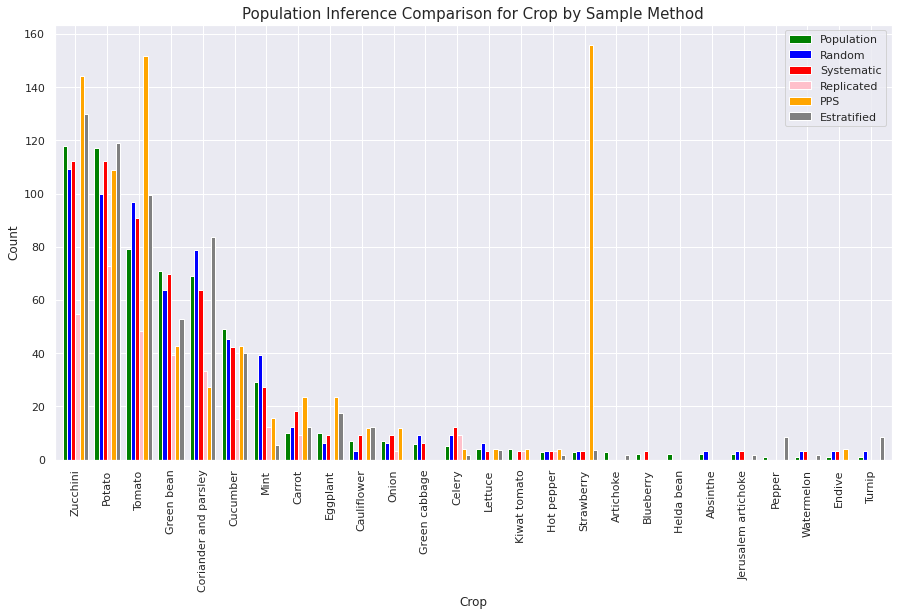

In [ ]:
#@title #### Comparing the Crop Inference from the Samples

P = len(df)/len(random1)

random_Estimated_Population_Crop = random1.Crop.value_counts() * P

systematic_Estimated_Population_Crop = systematic.Crop.value_counts() * P
 
replicated_Estimated_Population_Crop = replicated.Crop.value_counts() * P

# Inference for Stratified sampling
proportion_stratum1 = len(lower)/lower_sample
proportion_stratum2 = len(upper)/upper_sample

s1 = lower_df.Crop.value_counts()*proportion_stratum1 
s2 = upper_df.Crop.value_counts()*proportion_stratum2

s = pd.concat([s1,s2],axis = 1).fillna(0)
stratified_Estimated_Population_Crop = s.iloc[:,0]+s.iloc[:,1]

# Inference for PPS sampling

sampling_proportion = df['Field_area'].sum()/len(pps)

pps_Estimated_Population_Crop = pps.Crop.value_counts() * sampling_proportion

# Get all unique crops from the different value_counts dataframes
#all_crops = set(df.Crop.value_counts().index).union(random_Estimated_Population_Crop.index, systematic_Estimated_Population_Crop.index, replicated_Estimated_Population_Crop.index, pps_Estimated_Population_Crop.index, stratified_Estimated_Population_Crop.index)
all_crops = set(df.Crop.value_counts().index)
# Create a new DataFrame with all the unique crops and fill it with the counts
df_all_crops = pd.DataFrame(index=all_crops)
df_all_crops['Population'] = df.Crop.value_counts()
df_all_crops['Random'] = random_Estimated_Population_Crop
df_all_crops['Systematic'] = systematic_Estimated_Population_Crop
df_all_crops['Replicated'] = replicated_Estimated_Population_Crop
df_all_crops['PPS'] = pps_Estimated_Population_Crop
df_all_crops['Estratified'] = stratified_Estimated_Population_Crop

# Filling null values
df_all_crops.fillna(0,inplace = True)

fig,ax = plt.subplots(figsize = (15,8))
df_all_crops.sort_values(by='Population',ascending = False).plot(kind='bar', color = ['green', 'blue', 'red', 'pink', 'orange', 'grey'], width = 0.8,ax = ax)
plt.title('Population Inference Comparison for Crop by Sample Method',fontsize =15)
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()


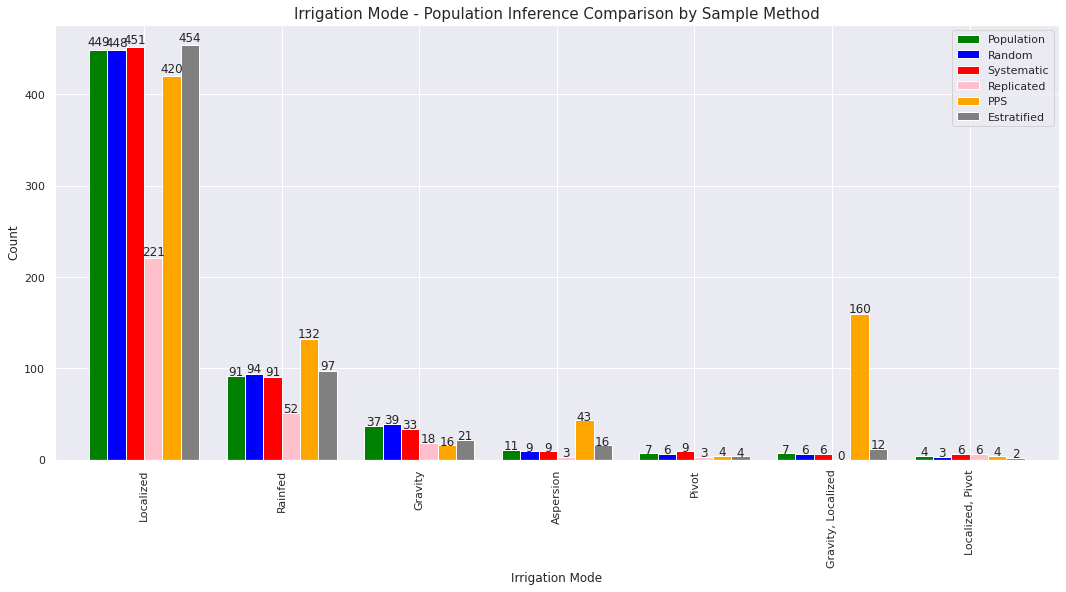

In [ ]:
#@title #### Comparing the Irrigation Mode Inference from the Samples

random_Estimated_Population_Irrigation_Mode = random1.Irrigation_mode.value_counts() * P

systematic_Estimated_Population_Irrigation_Mode = systematic.Irrigation_mode.value_counts() * P
 
replicated_Estimated_Population_Irrigation_Mode = replicated.Irrigation_mode.value_counts() * P

# Inference for Stratified sampling
s1 = lower_df.Irrigation_mode.value_counts()*proportion_stratum1 
s2 = upper_df.Irrigation_mode.value_counts()*proportion_stratum2

s = pd.concat([s1,s2],axis = 1).fillna(0)
stratified_Estimated_Population_Irrigation_Mode = s.iloc[:,0]+s.iloc[:,1]

# Inference for PPS sampling
pps_Estimated_Population_Irrigation_Mode = pps.Irrigation_mode.value_counts() * sampling_proportion

# Function to add values to each bar in barplot
def show_values1(axs, orient="v", df=[1], space=.01):
    '''
    Add values to bar plots.
    
    Parameters:
    axs (matplotlib.axes.Axes or numpy.ndarray): The axes object(s) to add values to.
    orient (str, optional): The orientation of the bars. Can be "v" (vertical) or "h" (horizontal). Default is "v".
    space (float, optional): The space between the bar and the value label. Default is 0.01.
    '''
    # Helper function to add values to a single axes object
    def _single(ax):
        if orient == "v":

          # Iterate through the patches (individual bars)
            for p in ax.patches:

               # Calculate the x and y position of the value label
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)

                # Format the value as a string and add it to the plot
                value = '{}'.format(round(p.get_height()))
                ax.text(_x, _y, value, ha="center") 
                                
    # If axs is an array, apply the function to each element
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)

    # If axs is a single axes object, apply the function to it
    else:
        _single(axs)

# Get all unique crops from the different value_counts dataframes
all_modes = set(df.Irrigation_mode.value_counts().index)

# Create a new DataFrame with all the unique crops and fill it with the counts
df_all_modes = pd.DataFrame(index=all_modes)
df_all_modes['Population'] = df.Irrigation_mode.value_counts()
df_all_modes['Random'] = random_Estimated_Population_Irrigation_Mode
df_all_modes['Systematic'] = systematic_Estimated_Population_Irrigation_Mode
df_all_modes['Replicated'] = replicated_Estimated_Population_Irrigation_Mode
df_all_modes['PPS'] = pps_Estimated_Population_Irrigation_Mode
df_all_modes['Estratified'] = stratified_Estimated_Population_Irrigation_Mode

# Filling null values
df_all_modes.fillna(0,inplace = True)

fig,ax = plt.subplots(figsize = (18,8))
show_values1(df_all_modes.sort_values(by='Population',ascending = False).plot(kind='bar', color = ['green', 'blue', 'red', 'pink', 'orange', 'grey'], width = 0.8,ax = ax))
plt.title('Irrigation Mode - Population Inference Comparison by Sample Method',fontsize =15)
plt.xlabel('Irrigation Mode')
plt.ylabel('Count')
plt.show()


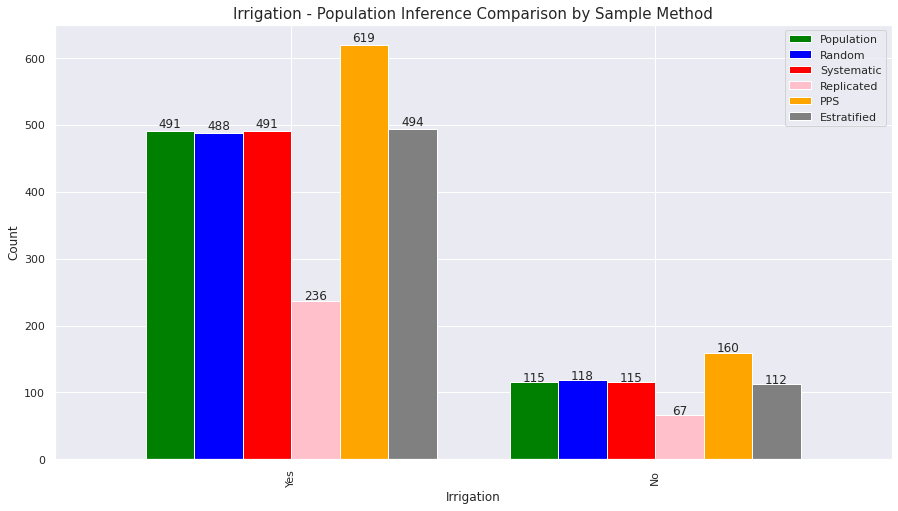

In [ ]:
#@title #### Comparing the Irrigation Inference from the Samples
random_Estimated_Population_Irrigation = random1.Irrigation.value_counts() * P

systematic_Estimated_Population_Irrigation = systematic.Irrigation.value_counts() * P
 
replicated_Estimated_Population_Irrigation = replicated.Irrigation.value_counts() * P

# Inference for Stratified sampling
s1 = lower_df.Irrigation.value_counts()*proportion_stratum1 
s2 = upper_df.Irrigation.value_counts()*proportion_stratum2

s = pd.concat([s1,s2],axis = 1).fillna(0)
stratified_Estimated_Population_Irrigation = s.iloc[:,0]+s.iloc[:,1]

# Inference for PPS sampling
pps_Estimated_Population_Irrigation = pps.Irrigation.value_counts() * sampling_proportion


# Get all unique crops from the different value_counts dataframes
all_irrigation = set(df.Irrigation.value_counts().index)

# Create a new DataFrame with all the unique crops and fill it with the counts
df_all_irrigation = pd.DataFrame(index=all_irrigation)
df_all_irrigation['Population'] = df.Irrigation.value_counts()
df_all_irrigation['Random'] = random_Estimated_Population_Irrigation
df_all_irrigation['Systematic'] = systematic_Estimated_Population_Irrigation
df_all_irrigation['Replicated'] = replicated_Estimated_Population_Irrigation
df_all_irrigation['PPS'] = pps_Estimated_Population_Irrigation
df_all_irrigation['Estratified'] = stratified_Estimated_Population_Irrigation

# Filling null values
df_all_irrigation.fillna(0,inplace = True)

fig,ax = plt.subplots(figsize = (15,8))
show_values1(df_all_irrigation.sort_values(by='Population',ascending = False).plot(kind='bar', color = ['green', 'blue', 'red', 'pink', 'orange', 'grey'], width = 0.8,ax = ax))
plt.title('Irrigation - Population Inference Comparison by Sample Method',fontsize =15)
plt.xlabel('Irrigation')
plt.ylabel('Count')
plt.show()

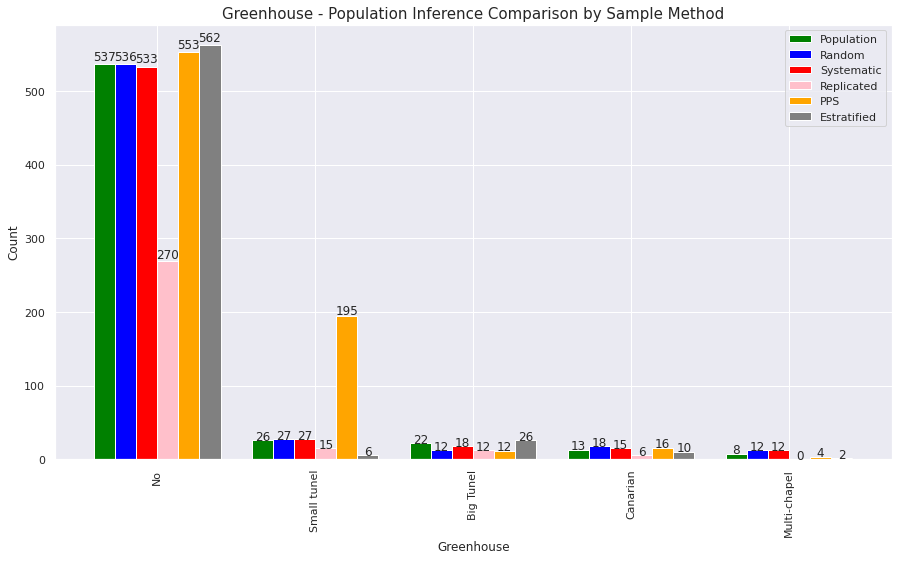

In [ ]:
#@title #### Comparing the Green House Inference from the Samples

random_Estimated_Population_Greenhouse = random1.Greenhouse.value_counts() * P

systematic_Estimated_Population_Greenhouse = systematic.Greenhouse.value_counts() * P
 
replicated_Estimated_Population_Greenhouse = replicated.Greenhouse.value_counts() * P

# Inference for Stratified sampling
s1 = lower_df.Greenhouse.value_counts()*proportion_stratum1 
s2 = upper_df.Greenhouse.value_counts()*proportion_stratum2

s = pd.concat([s1,s2],axis = 1).fillna(0)
stratified_Estimated_Population_Greenhouse = s.iloc[:,0]+s.iloc[:,1]

# Inference for PPS sampling
pps_Estimated_Population_Greenhouse = pps.Greenhouse.value_counts() * sampling_proportion


# Get all unique crops from the different value_counts dataframes
all_Greenhouse = set(df.Greenhouse.value_counts().index)

# Create a new DataFrame with all the unique crops and fill it with the counts
df_all_Greenhouse = pd.DataFrame(index=all_Greenhouse)
df_all_Greenhouse['Population'] = df.Greenhouse.value_counts()
df_all_Greenhouse['Random'] = random_Estimated_Population_Greenhouse
df_all_Greenhouse['Systematic'] = systematic_Estimated_Population_Greenhouse
df_all_Greenhouse['Replicated'] = replicated_Estimated_Population_Greenhouse
df_all_Greenhouse['PPS'] = pps_Estimated_Population_Greenhouse
df_all_Greenhouse['Estratified'] = stratified_Estimated_Population_Greenhouse

# Filling null values
df_all_Greenhouse.fillna(0,inplace = True)

fig,ax = plt.subplots(figsize = (15,8))
show_values1(df_all_Greenhouse.sort_values(by='Population',ascending = False).plot(kind='bar', color = ['green', 'blue', 'red', 'pink', 'orange', 'grey'], width = 0.8,ax = ax))
plt.title('Greenhouse - Population Inference Comparison by Sample Method',fontsize =15)
plt.xlabel('Greenhouse')
plt.ylabel('Count')
plt.show()

# Dimensionality Reduction & Factor Analysis

We will use **Multiple Correspondence Analysis (MCA)** to plot all 6 variables on a 2D plot. It allows us to group individuals with similar profiles and check associations between variable categories.


In [8]:
df2 = df.copy() # to avoid override the original dataframe

# Creating bins for the numerical variable
df2["Field_area"] = pd.cut(df["Field_area"], [0, 2, 5, 10.5, float("inf")], labels=["Small", "Medium", "Large", "Very large"])

# New categorical variable distribution
df2.Field_area.value_counts()

Small         514
Medium         70
Large          18
Very large      4
Name: Field_area, dtype: int64

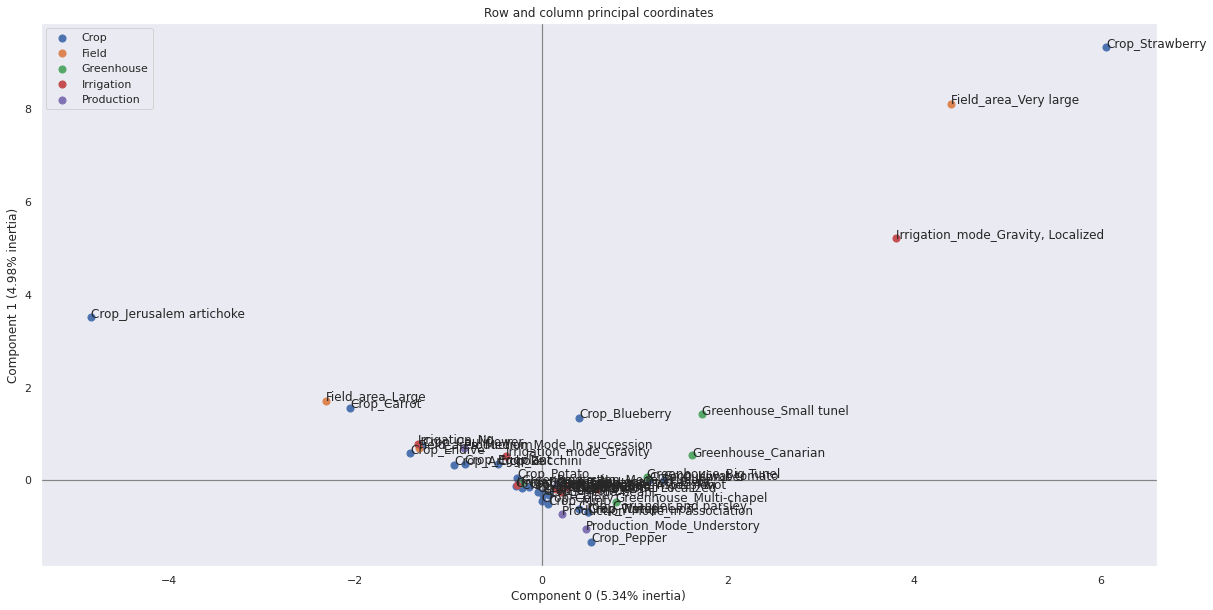

In [9]:
#@title #### Visualizing our findings:

!pip install --quiet prince
import prince

mca = prince.MCA()
mca.fit(df2) 
m= mca.transform(df2) 

ax = mca.plot_coordinates(
     X=df2[df2.columns.difference(['Crop_Group'])],
     ax=None,
     figsize=(20, 10),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=50,
     show_column_labels=True,
     legend_n_cols=1
     )

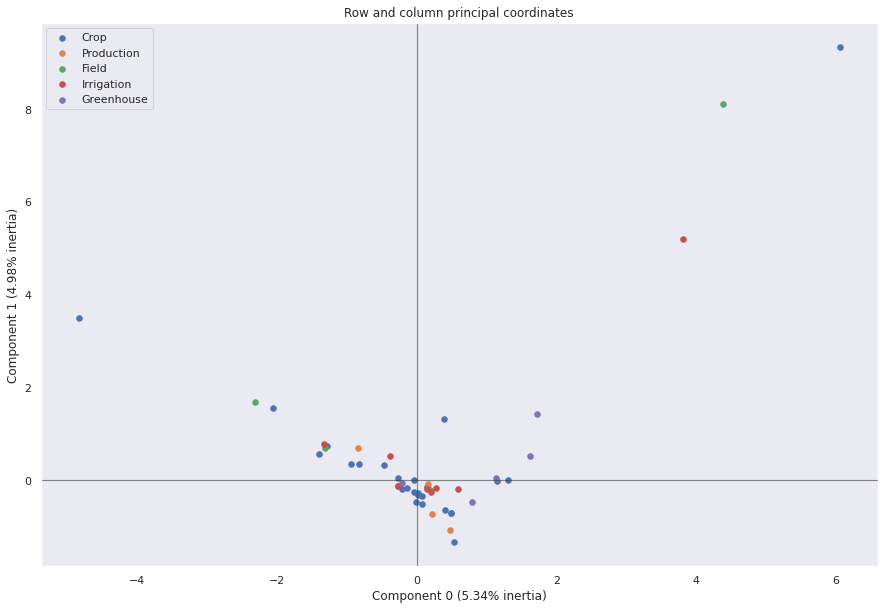

In [10]:
#@title 
# Fit and transform your data using MCA
mca = prince.MCA()
mca = mca.fit(df2)

# Plot the results
fig, ax = plt.subplots(figsize = (15,10))
mca.plot_coordinates(df2, ax=ax, show_row_points=False, show_column_points=True)

# Show the plot
plt.show()

Pending: 

Which variables are closest to each other ? Which variable categories are closest to each other ? What does it mean ? For example, are farmers more likely to use the same production and irrigation modes if they plant the same or similar crops ?

# Clustering

Example of Dendrogram clustering US states from online.visual-paradigm.com. Your graph should end with 606 leaves (ends of Dendrogram) ![image.png](https://online.visual-paradigm.com/repository/images/0fe81efd-c6f6-41af-98d5-d9b1f0d33f2f.png)


Finish the analysis with **k-means clustering to cluster variables and their categories.** The Dendogram clusters individuals into groups automatically. In k-means we need to specify the number of clusters before creating the chart. 

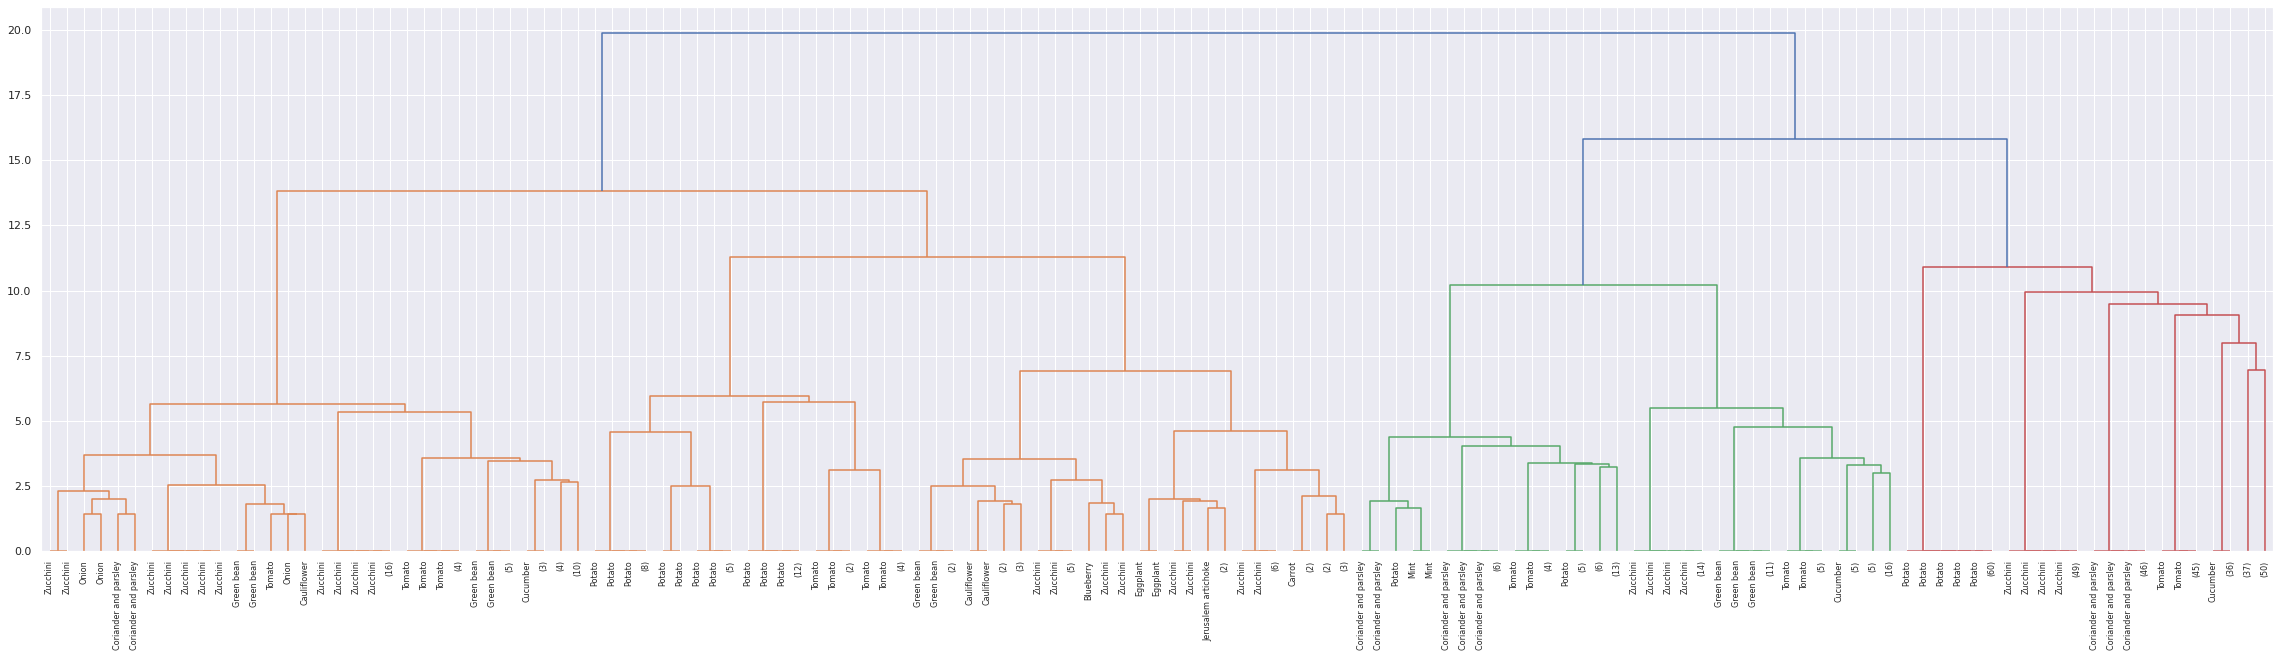

In [12]:
#@title ### Dendongram

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

df3 = df2.copy()
df3.set_index(df3.Crop, inplace = True)

# Data set
m2 = pd.get_dummies(df2[df2.columns.difference(['Crop_Group','Irrigation_mode','Greenhouse'])])
# Calculate the distance between each sample
Z = linkage(m2, 'ward')
 
# Plot with Custom leaves
fig,ax  = plt.subplots(figsize = (40,10))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df3.index, truncate_mode = 'level', p=7)

# Show the graph
plt.show()

We can se that there are 3 group inside our data.

# To be continue..!

Work in progress ⭐

NEXT STEPS:

- Create a Dendogram for each sampling frame. Check if the individuals clustered in the sample are in the same group compared to the previous section on the population.

- Check the same for the variables and categories clustered.

- Does this align with your Sampling & Inference analysis on the best sampling frame ?

- Summarize all findings to your stakeholder (Dashboard)

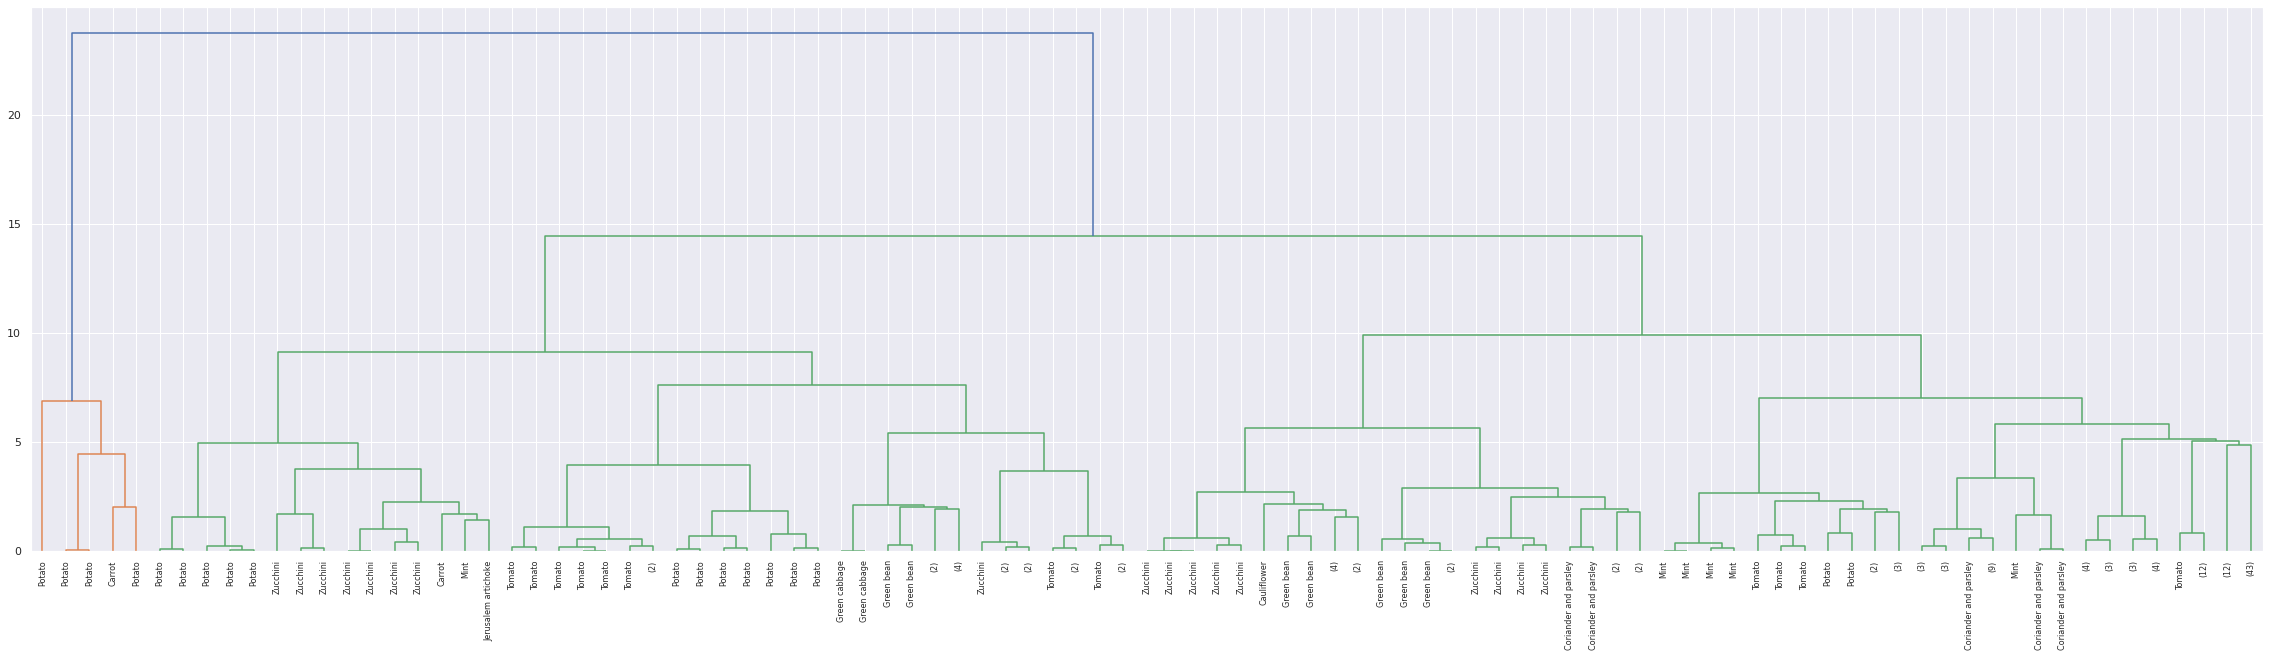

In [15]:
df_random = random1.copy()
df_random.set_index(df_random.Crop, inplace = True)

# Data set
m3 = pd.get_dummies(df_random[df_random.columns.difference(['Crop_Group','Irrigation_mode','Greenhouse'])])
# Calculate the distance between each sample
Z2 = linkage(m3, 'ward')
 
# Plot with Custom leaves
fig,ax  = plt.subplots(figsize = (40,10))
dendrogram(Z2, leaf_rotation=90, leaf_font_size=8, labels=df_random.index, truncate_mode = 'level', p=7)

# Show the graph
plt.show()

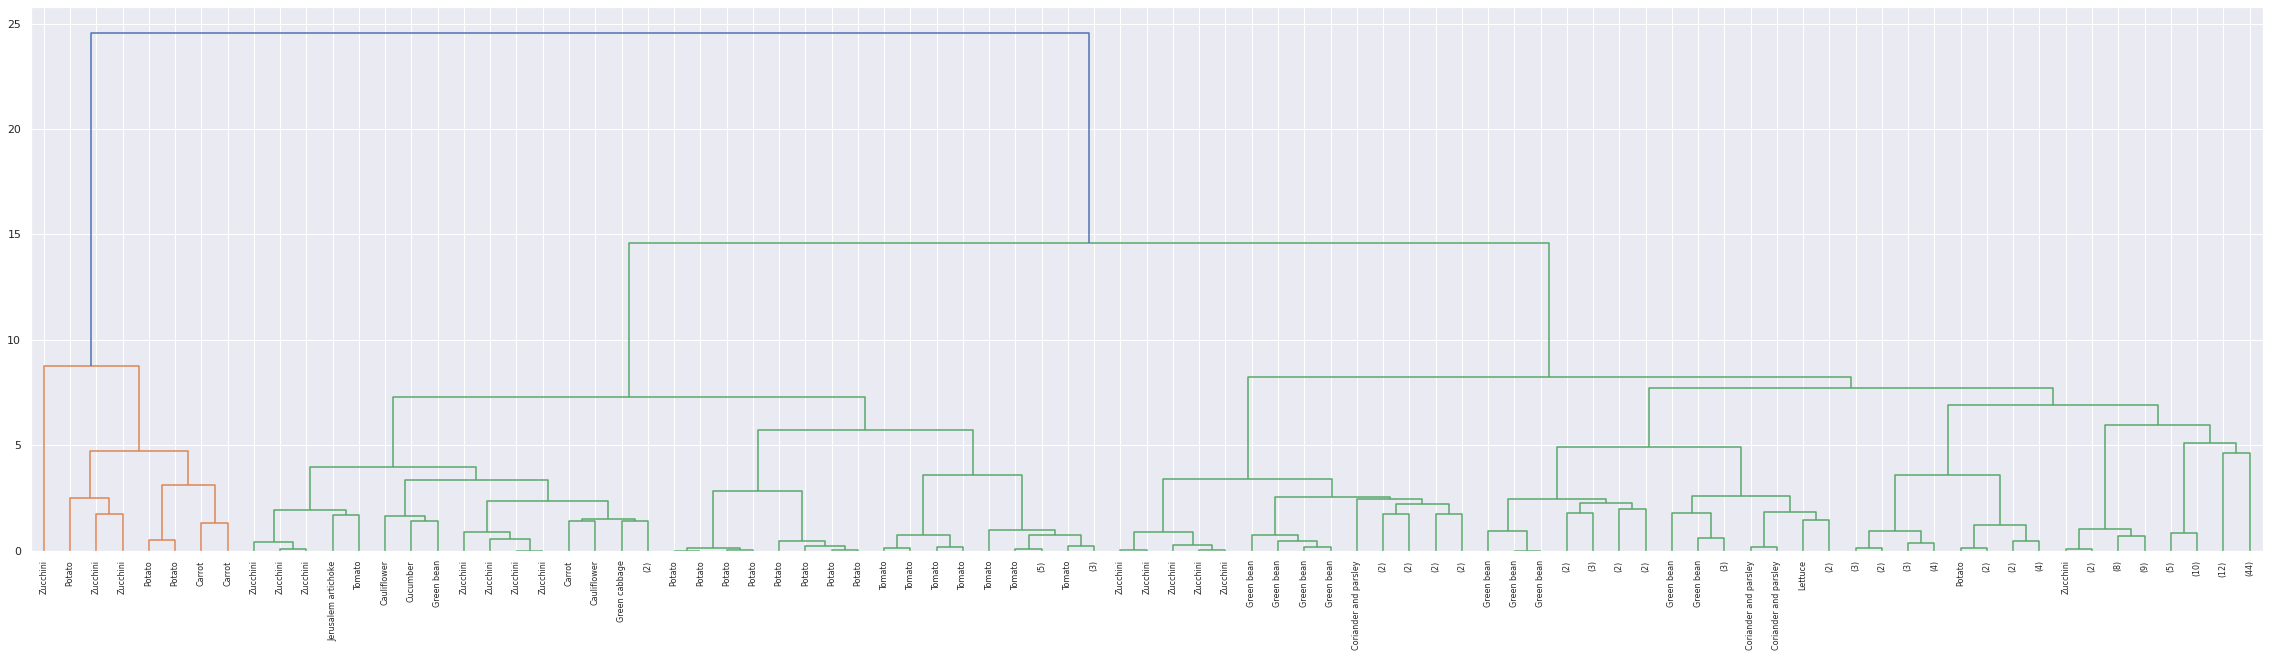

In [16]:
df_systematic = systematic.copy()
df_systematic.set_index(df_systematic.Crop, inplace = True)

# Data set
m4 = pd.get_dummies(df_systematic[df_systematic.columns.difference(['Crop_Group','Irrigation_mode','Greenhouse'])])
# Calculate the distance between each sample
Z3 = linkage(m4, 'ward')
 
# Plot with Custom leaves
fig,ax  = plt.subplots(figsize = (40,10))
dendrogram(Z3, leaf_rotation=90, leaf_font_size=8, labels=df_systematic.index, truncate_mode = 'level', p=7)

# Show the graph
plt.show()

<img src="https://i.pinimg.com/736x/f0/4a/08/f04a08853d407a93e6a06f1ce10c8173--poetry-inspiration-top-hats.jpg">

## References:



[PPS Sampling in Python by Aayush Malik](https://chaayushmalik.medium.com/pps-sampling-in-python-b5d5d4a8bdf7)

[How to compare two or more distributions](https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf)


[Stratified random sampling](https://www.investopedia.com/terms/stratified_random_sampling.asp#:~:text=For%20example%2C%20if%20the%20researcher,population%20size\)%20%C3%97%20stratum%20size)


[Inference](https://online.stat.psu.edu/stat200/lesson/1/1.2#paragraph--2297)